In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../Dataset/train_ver2.csv/train_ver2.csv')

C:\Users\Eden\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(13647309, 48)

In [5]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [13]:
df.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

### Data 설명
- fecha_dato             : 날짜
- ncodpers               : 고객 식별번호
- ind_empleado           : 고용 지표 (A: active, B: ex employed, F: filial, N: not employee, P: passive)
- pais_residencia        : 거주국가
- sexo                   : 성별
- age                    : 나이
- fecha_alta             : 은행과 첫 계약을 체결한 날짜
- ind_nuevo              : 신규 고객 지표(6개월 이내 신규 고객일 경우 값 = 1)
- antiguedad             : 은행 거래 누적 기간(월)
- indrel                 : 고객 등급(1 : 1등급, 99: 해당 달에 고객 1등급이 해제되는 1등급 고객)
- ult_fec_cli_1t         : 1등급 고객으로서 마지막 날짜
- indrel_1mes            : 월초 기준 고객 등급(1: 1등급고개, 2: co-owner, P: potential, 3: former primary, 4 former co-owner)
- tiprel_1mes            : 월초 기준 고객 관계 유형 (A : active, I: inactive, P:former customer, R: potential)
- indresi                : 거주 지표(고객의 거주 국가와 은행이 위치한 국가 동일 여부 : S(yes) or N(No)
- indext                 : 외국인 지표(고객의 태어난 국가와 은행이 위치한 국가 동일 여부 : S(yes) or N(No)
- conyuemp               : 배우자 지표(1 : 은행 직원을 배우자로 둔 고객)
- canal_entrada          : 고객 유입 채널
- indfall                : 고객 사망 여부(S (yes) or N(No))
- tipodom                : 주소 유형(1: primary address)
- cod_prov               : 지방 코드(주소 기반)
- nomprov                : 지방 이름 
- ind_actividad_cliente  : 활발성 지표(1: active customer, 2: inactive customer)
- renta                  : 가구 총수입
- segmento               : 분류(01: VIP, 02: 개인, 03: 대졸)
- ind_ahor_fin_ult1      : 예금
- ind_aval_fin_ult1      : 보증
- ind_cco_fin_ult1       : 당좌 예금
- ind_cder_fin_ult1      : 파생 상품 계좌
- ind_cno_fin_ult1       : 급여 계정
- ind_ctju_fin_ult1      : 청소년 계정
- ind_ctma_fin_ult1      : 마스 특별 계정
- ind_ctop_fin_ult1      : 특정 계정
- ind_ctpp_fin_ult1      : 특정 플러스 계정
- ind_deco_fin_ult1      : 단기 예금
- ind_deme_fin_ult1      : 중기 예금
- ind_dela_fin_ult1      : 장기 예금
- ind_ecue_fin_ult1      : e-계정
- ind_fond_fin_ult1      : 펀드
- ind_hip_fin_ult1       : 부동산 대출
- ind_plan_fin_ult1      : 연금
- ind_pres_fin_ult1      : 대출
- ind_reca_fin_ult1      : 세금
- ind_tjcr_fin_ult1      : 신용카드
- ind_valo_fin_ult1      : 증권
- ind_viv_fin_ult1       : 홈 계정
- ind_nomina_ult1        : 급여
- ind_nom_pens_ult1      : 연금
- ind_recibo_ult1        : 직불 카드

### 고객 변수(1~24열)중 수치형 변수 추출

In [14]:
num_cols = [col for col in df.columns[:24] if df[col].dtype in ['int64', 'float64']]
df[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


### 고객변수(1~24열)중 범주현 변수 추출

In [15]:
cat_cols = [col for col in df.columns[:24] if df[col].dtype in ['object']]
df[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


### 범주형 변수의 고유값 출력

In [18]:
for col in cat_cols:
    uniq = np.unique(df[col].astype(str))
    print('-' * 50)
    print('col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RO

--------------------------------------------------
col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KCJ' 'KCK' 'KC

### 데이터 시각화

--------------------------------------------------
col :  fecha_dato


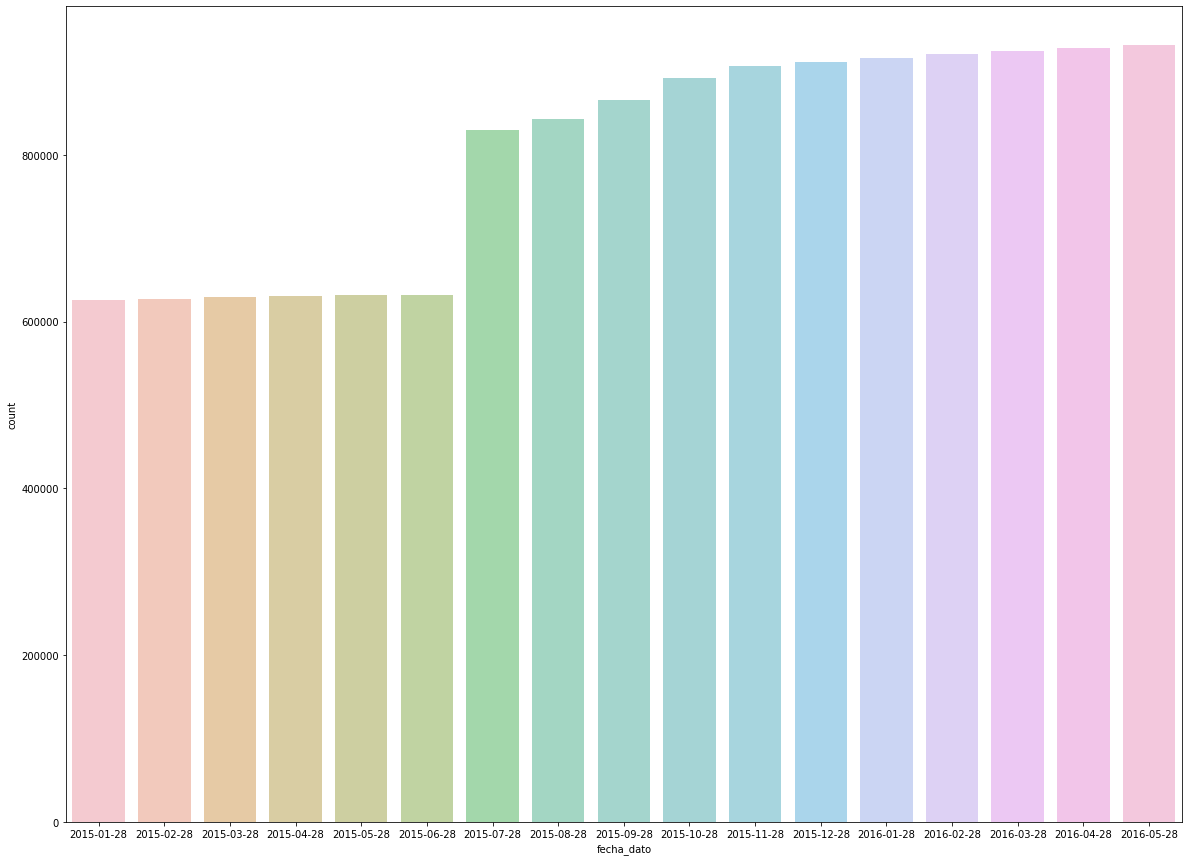

--------------------------------------------------
col :  ind_empleado


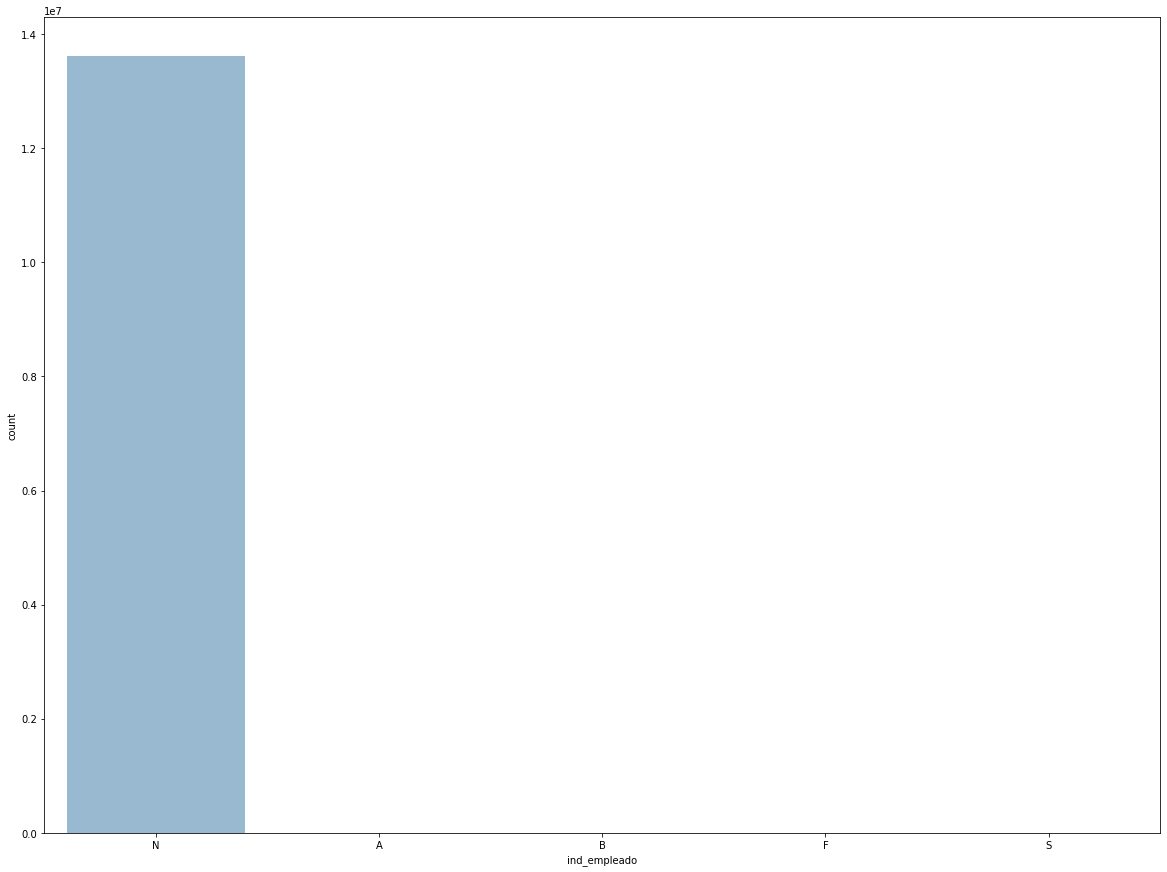

--------------------------------------------------
col :  pais_residencia


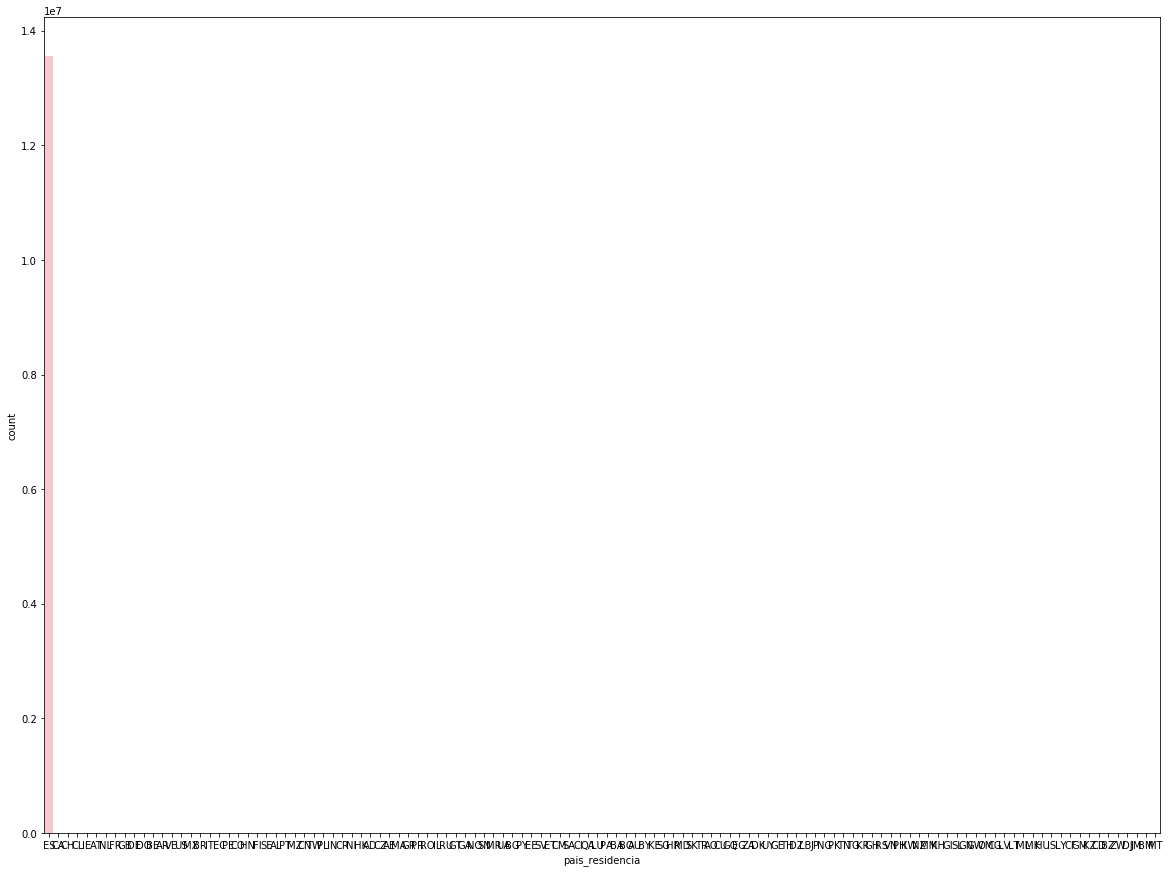

--------------------------------------------------
col :  sexo


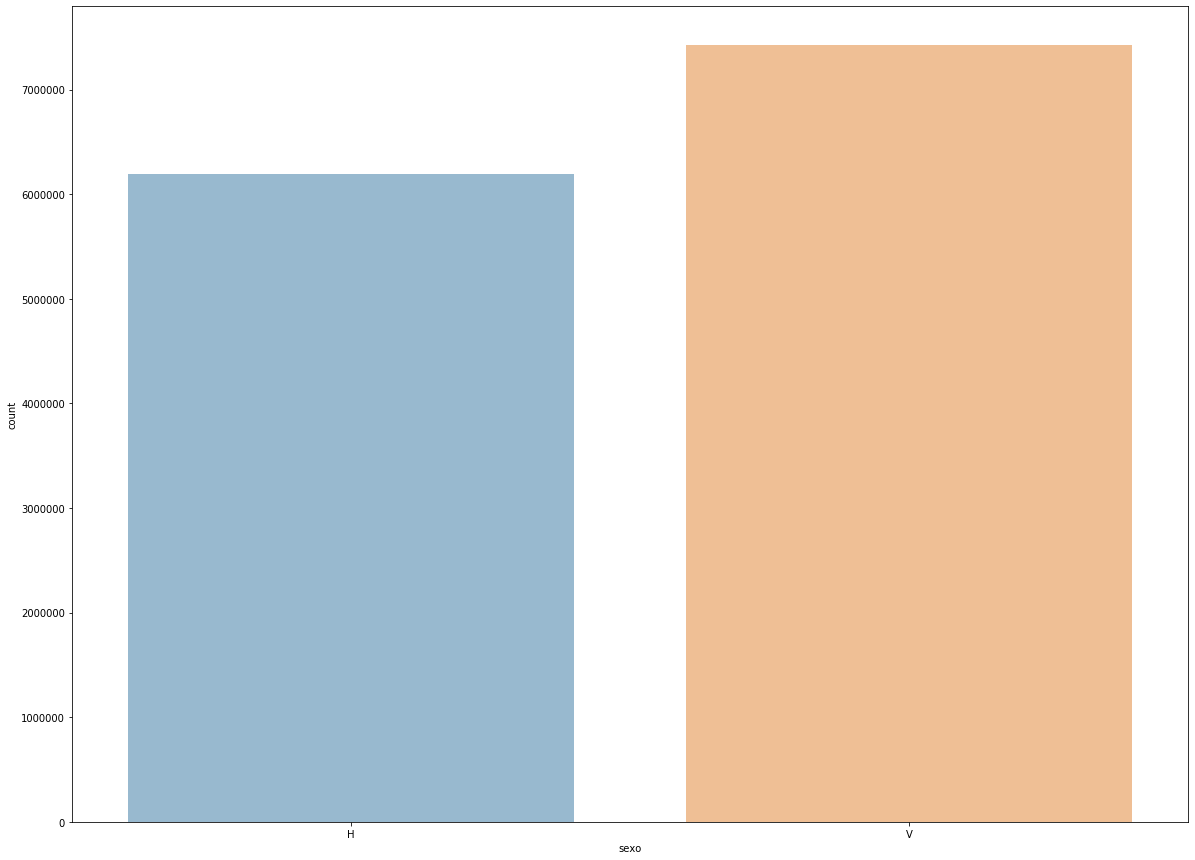

--------------------------------------------------
col :  age


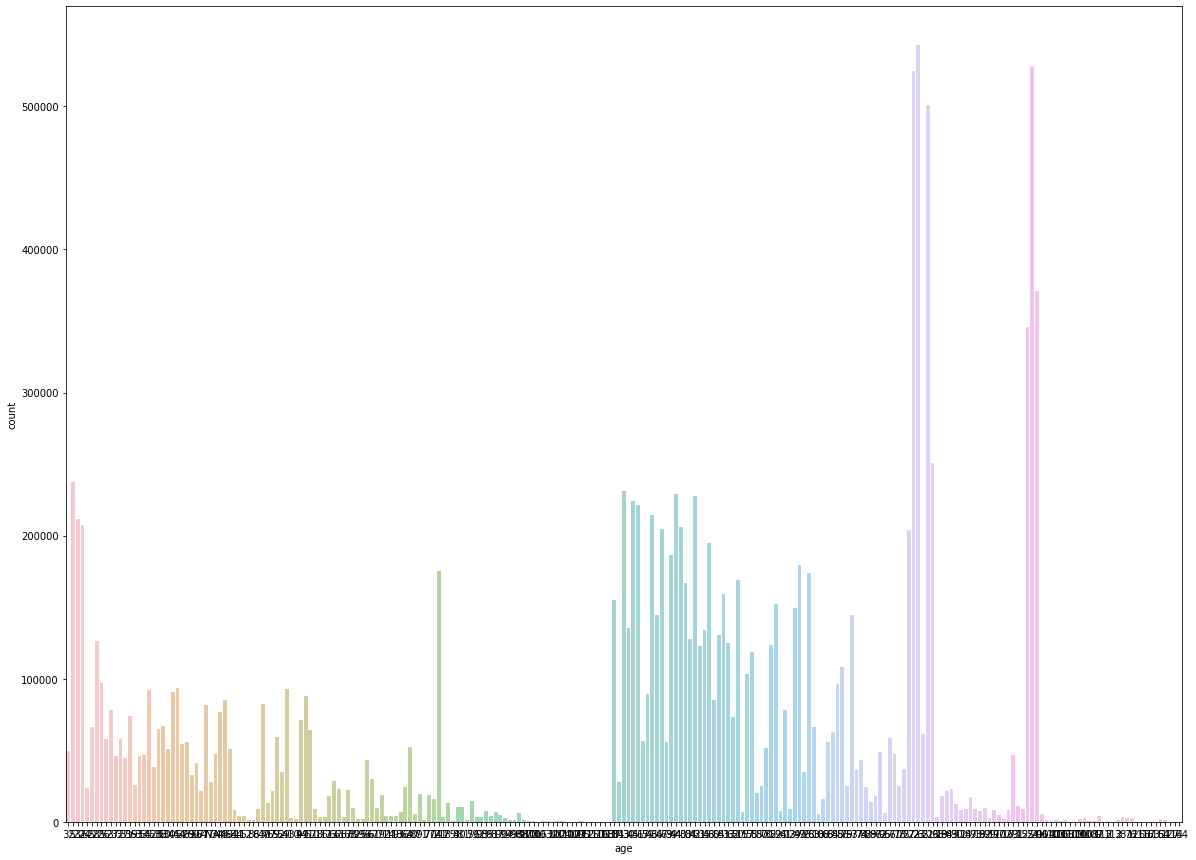

--------------------------------------------------
col :  fecha_alta


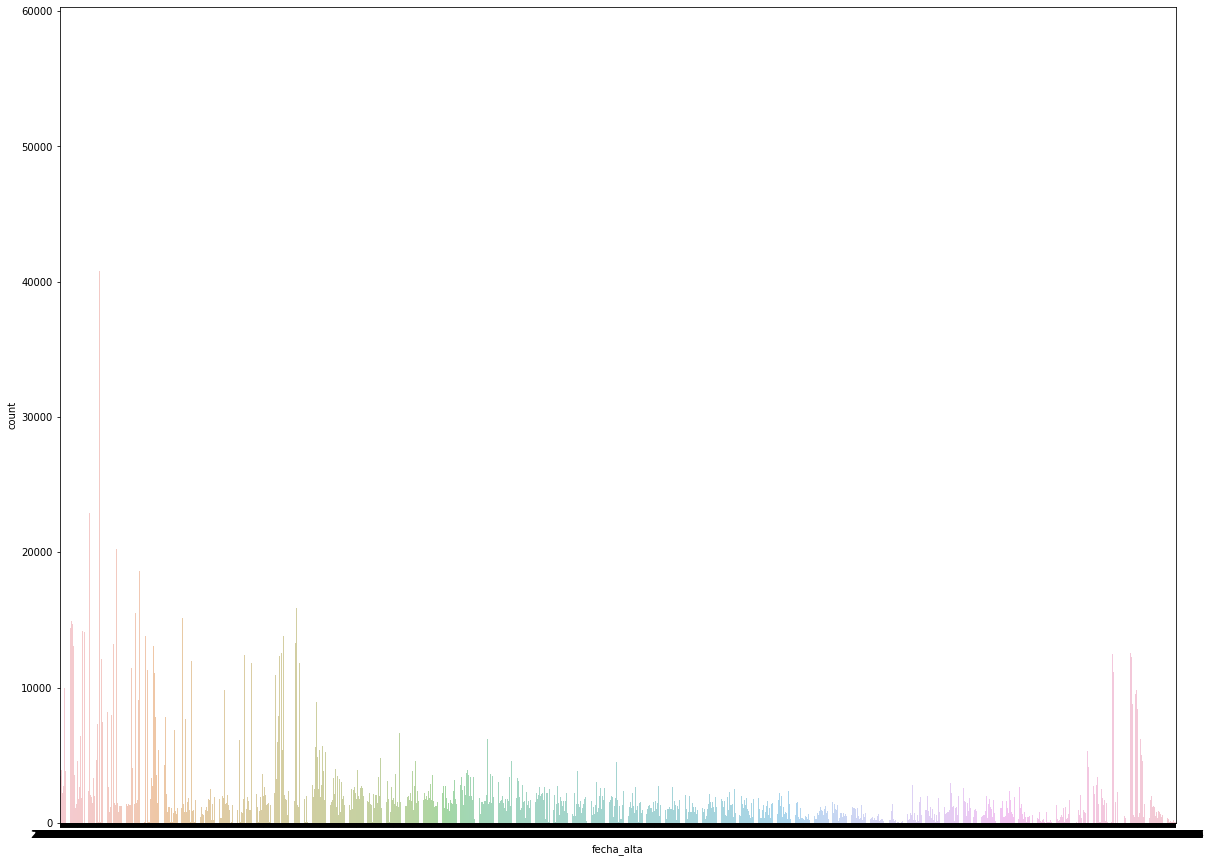

--------------------------------------------------
col :  ind_nuevo


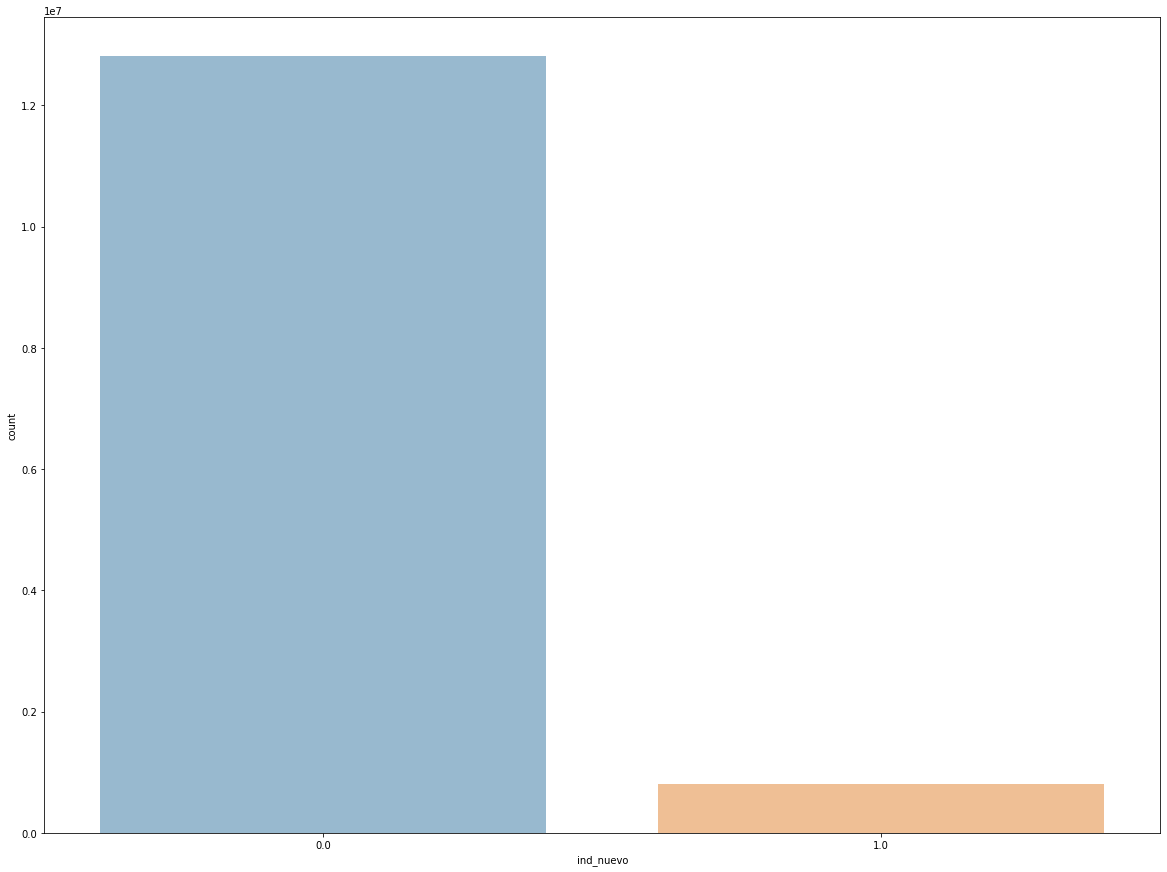

--------------------------------------------------
col :  antiguedad


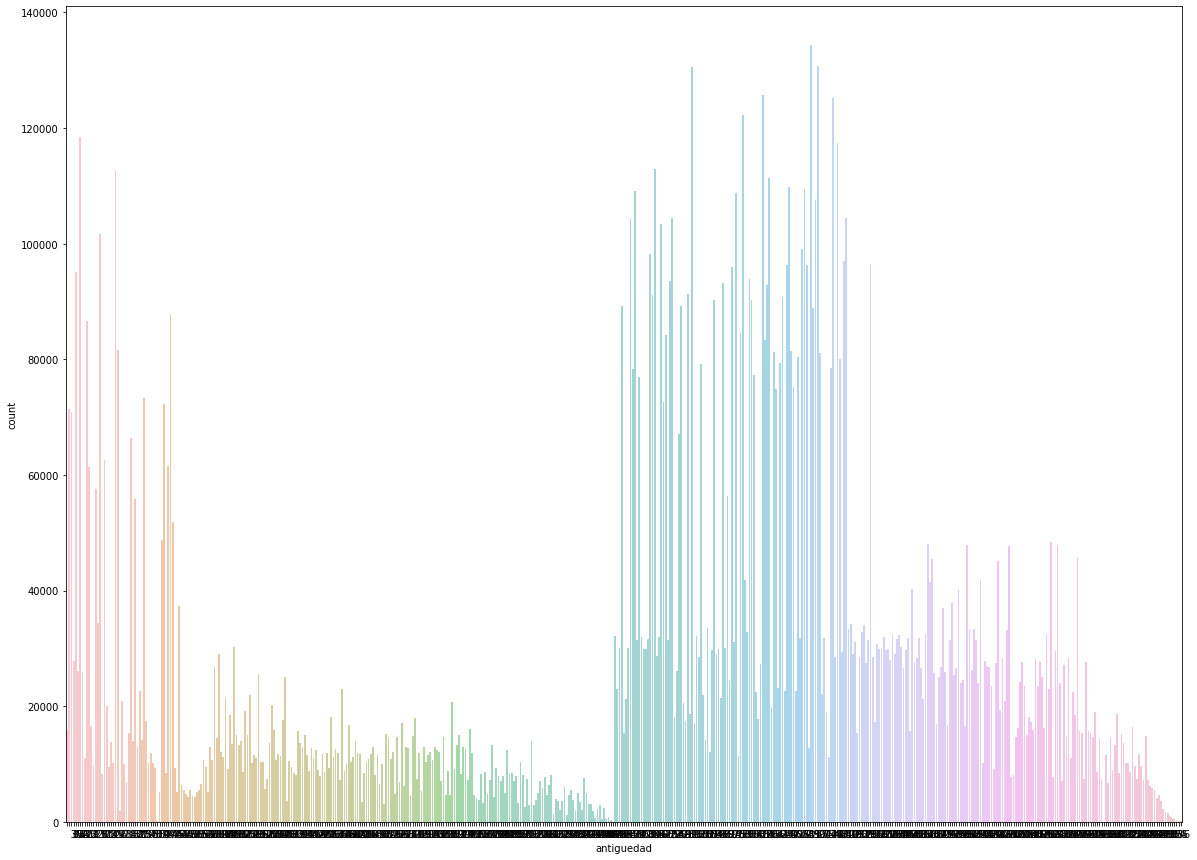

--------------------------------------------------
col :  indrel


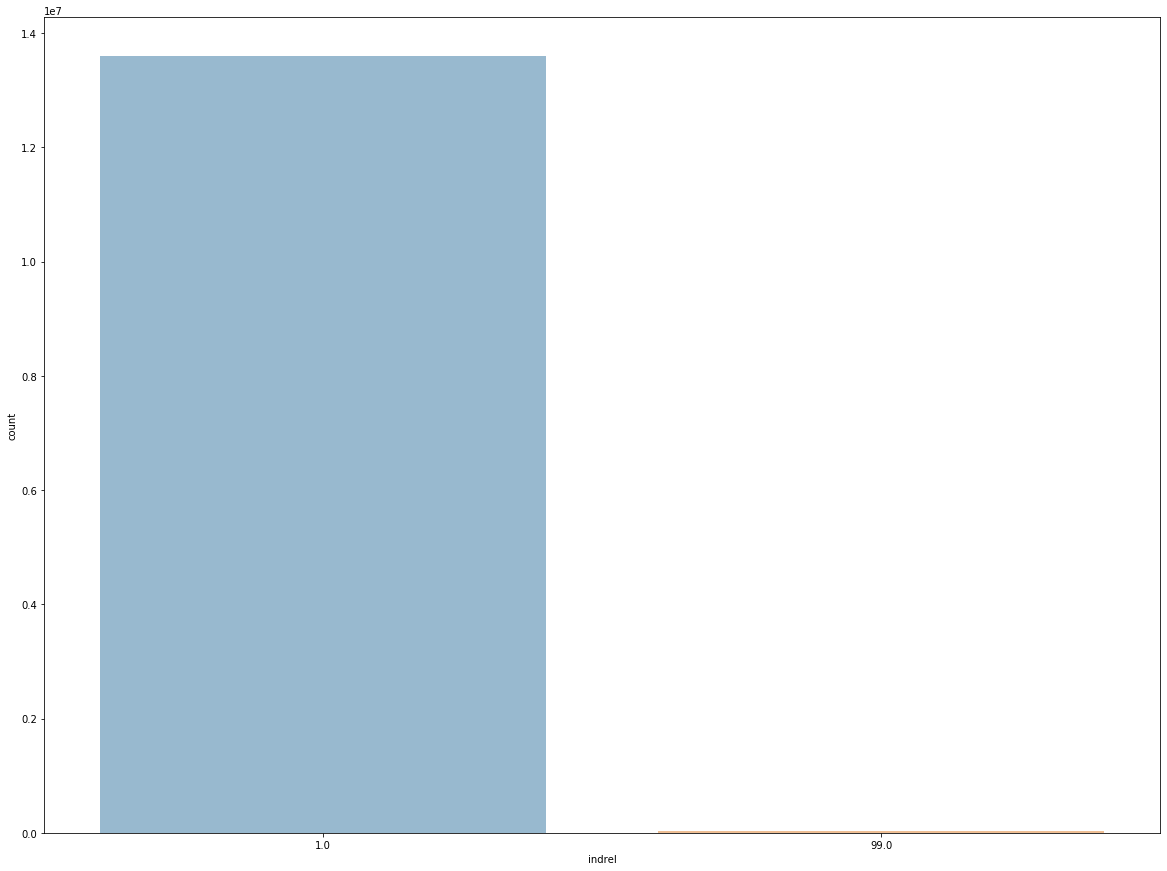

--------------------------------------------------
col :  ult_fec_cli_1t


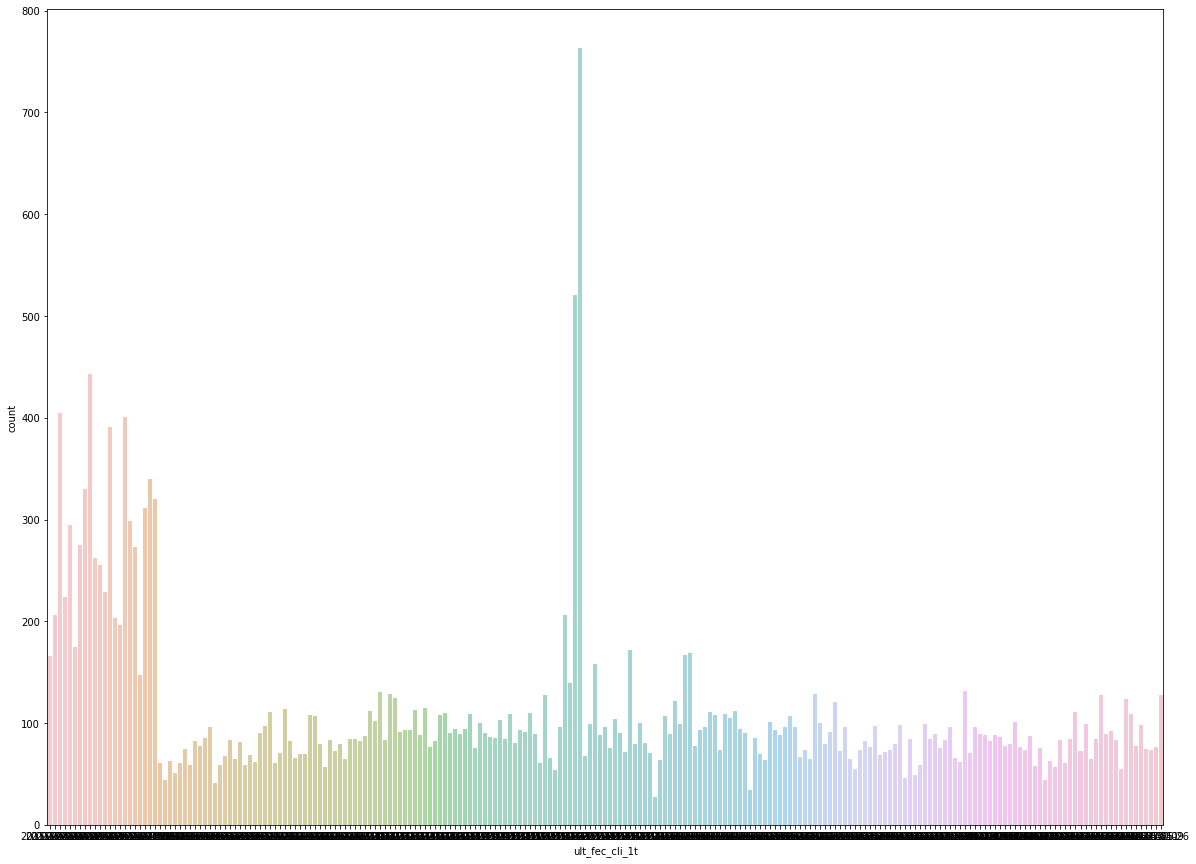

--------------------------------------------------
col :  indrel_1mes


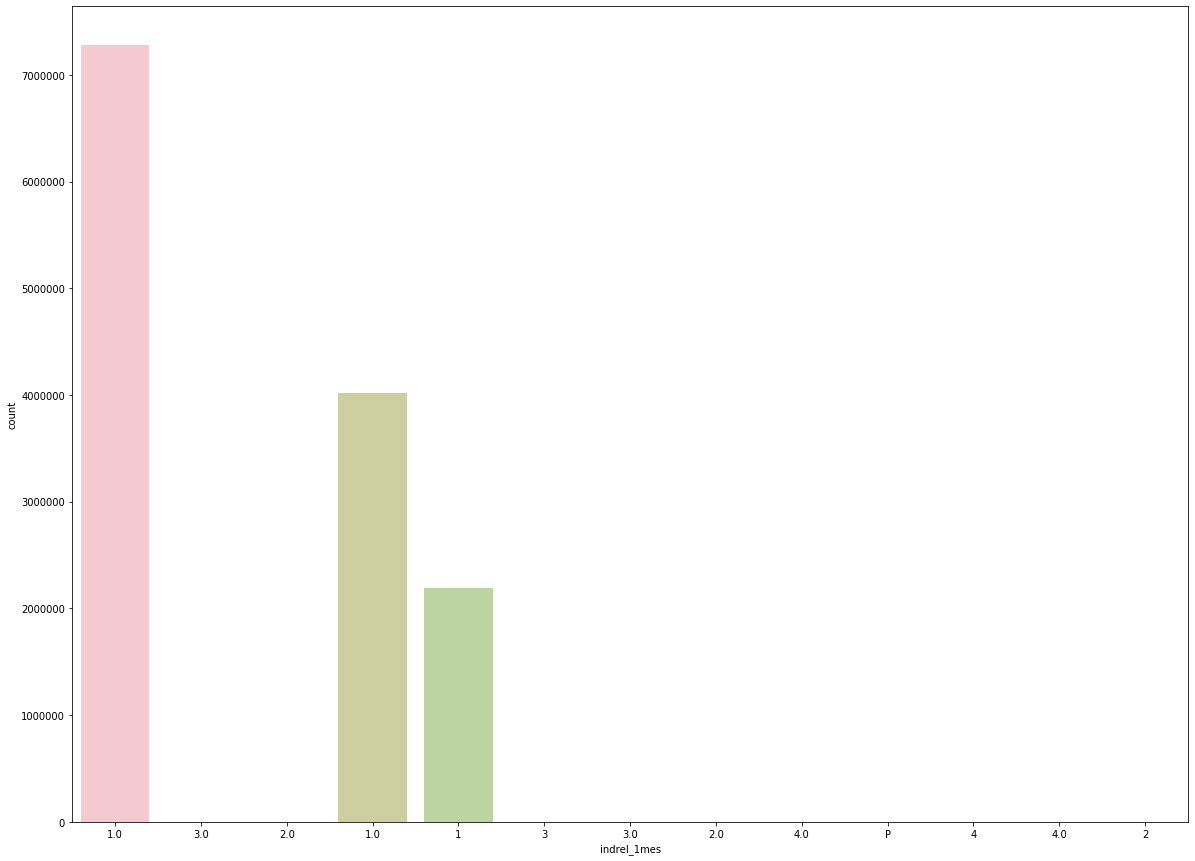

--------------------------------------------------
col :  tiprel_1mes


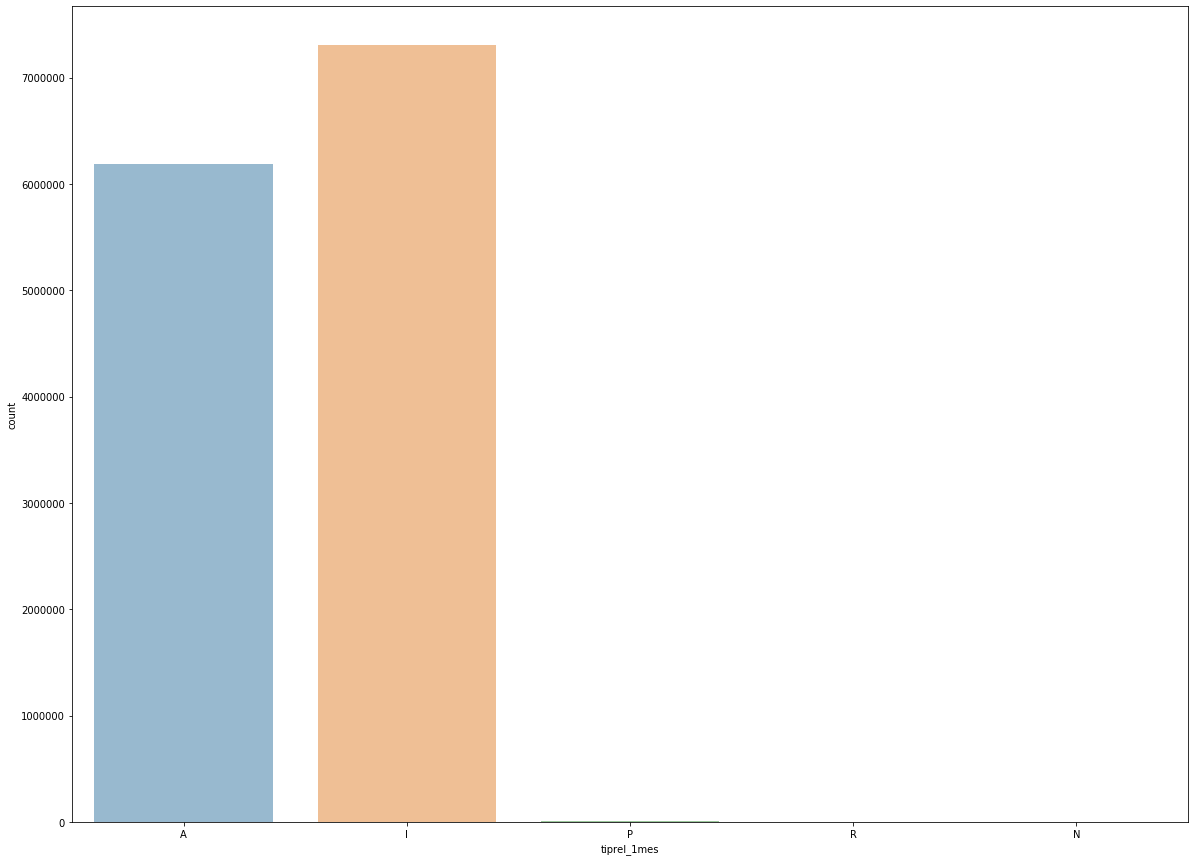

--------------------------------------------------
col :  indresi


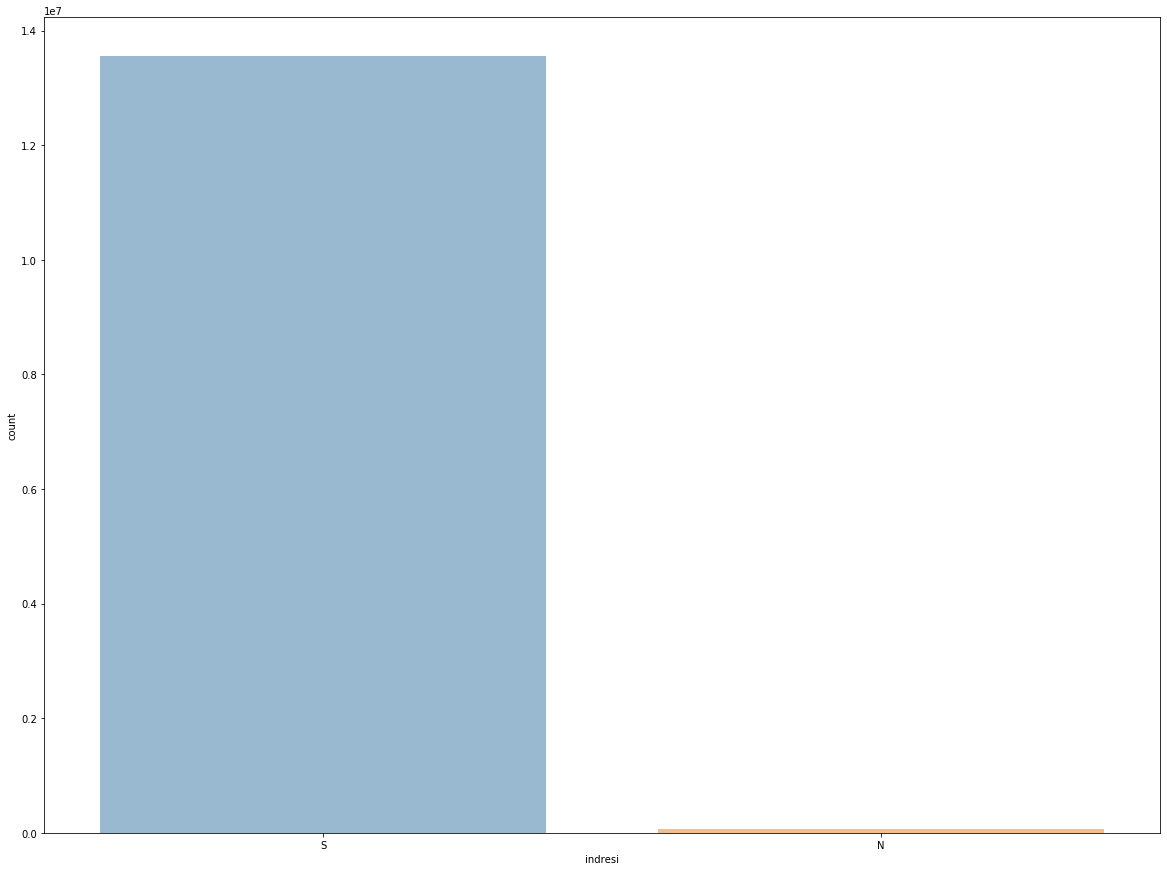

--------------------------------------------------
col :  indext


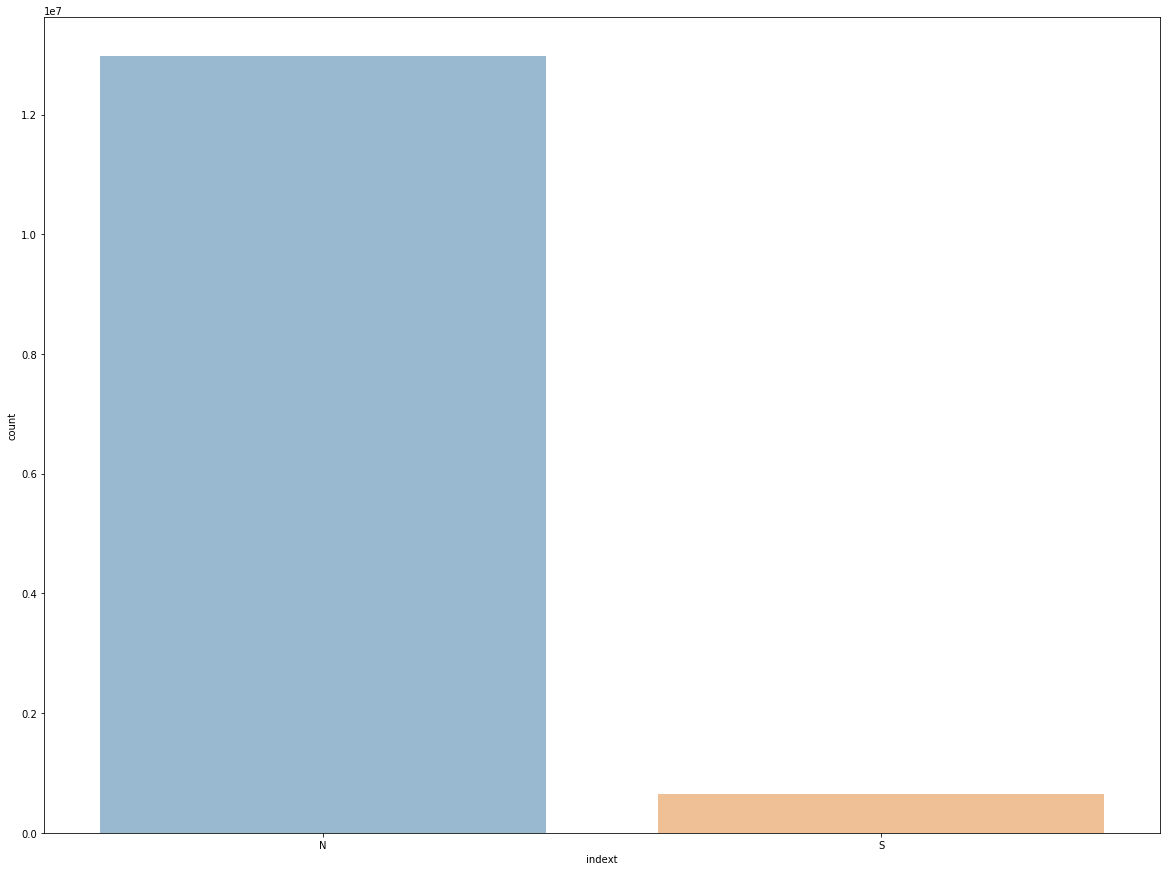

--------------------------------------------------
col :  conyuemp


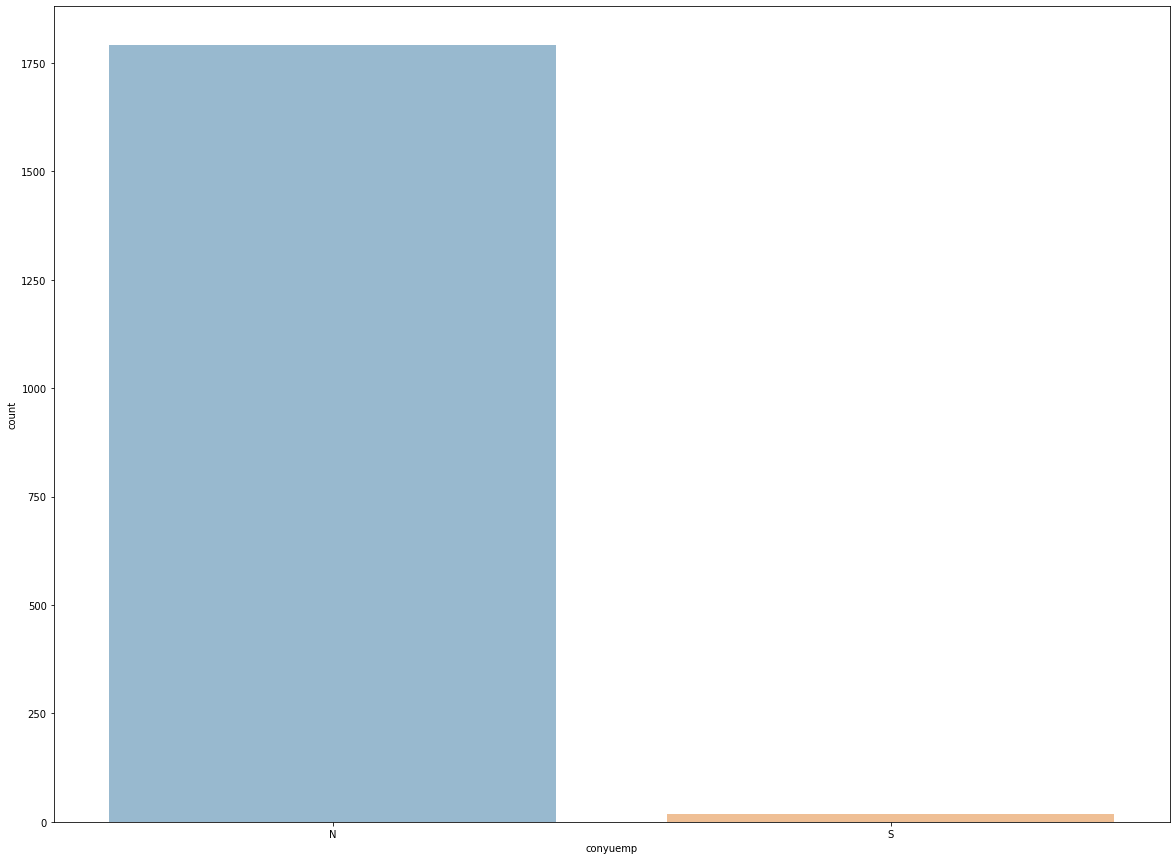

--------------------------------------------------
col :  canal_entrada


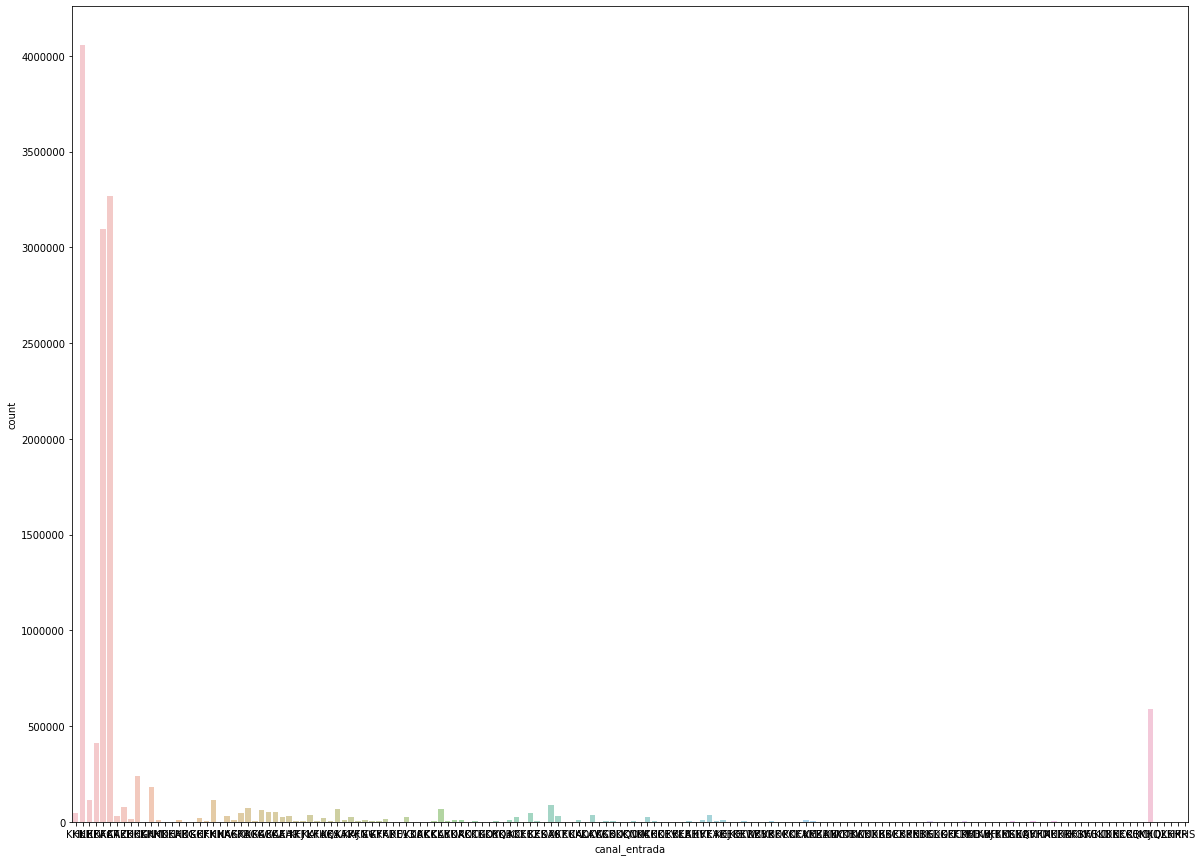

--------------------------------------------------
col :  indfall


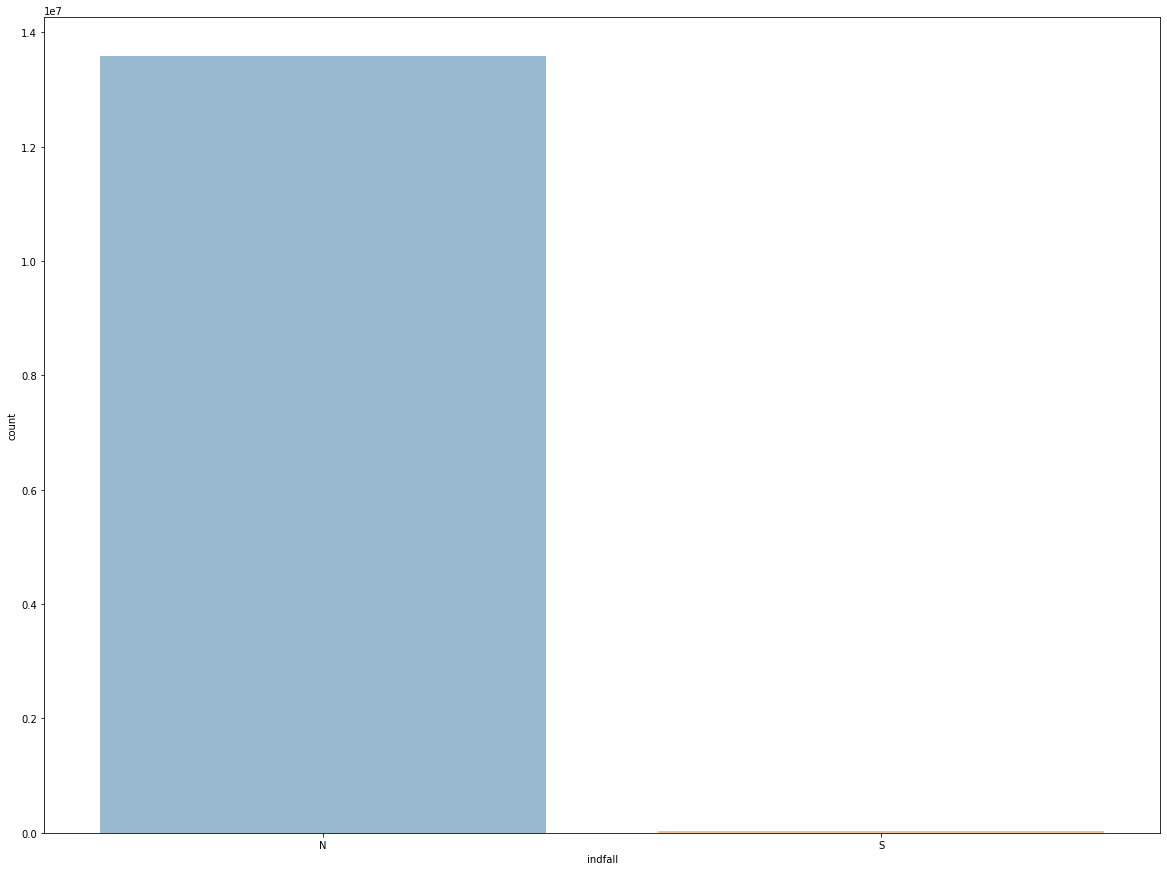

--------------------------------------------------
col :  tipodom


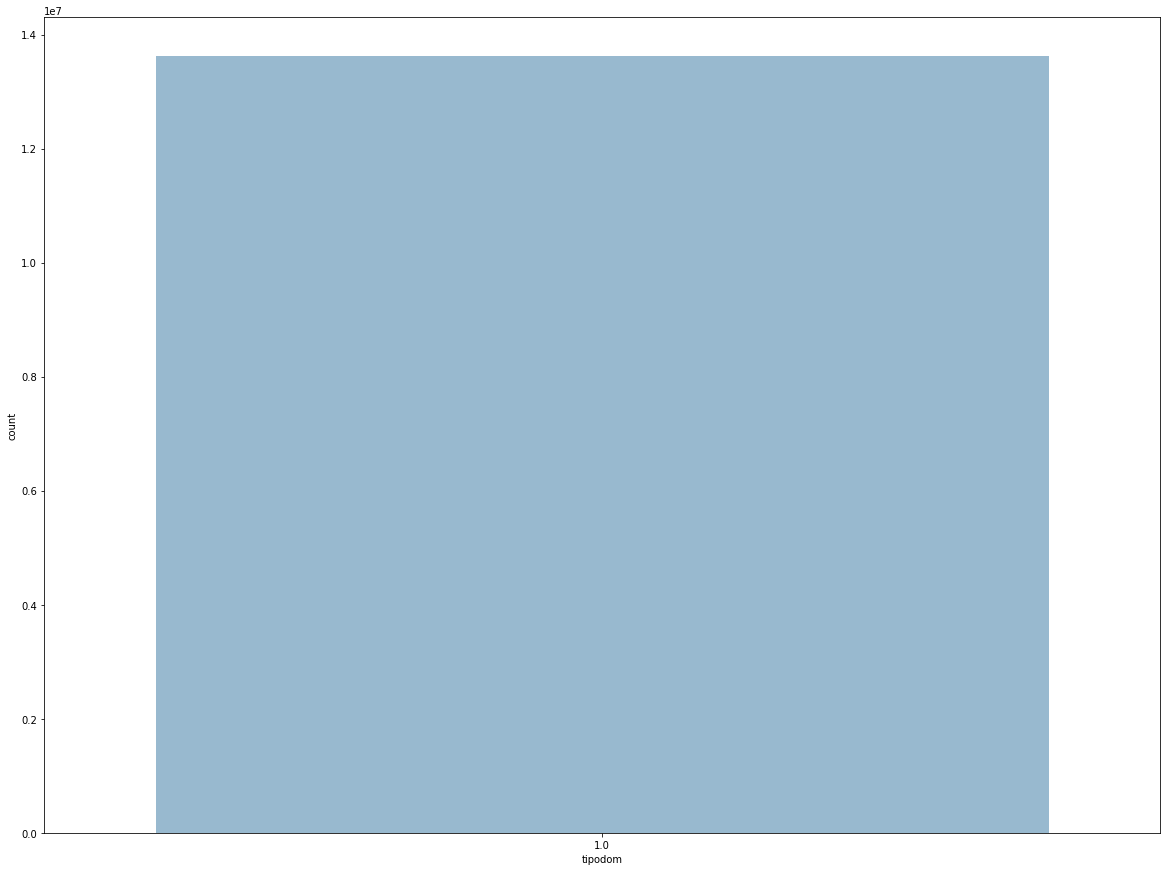

--------------------------------------------------
col :  cod_prov


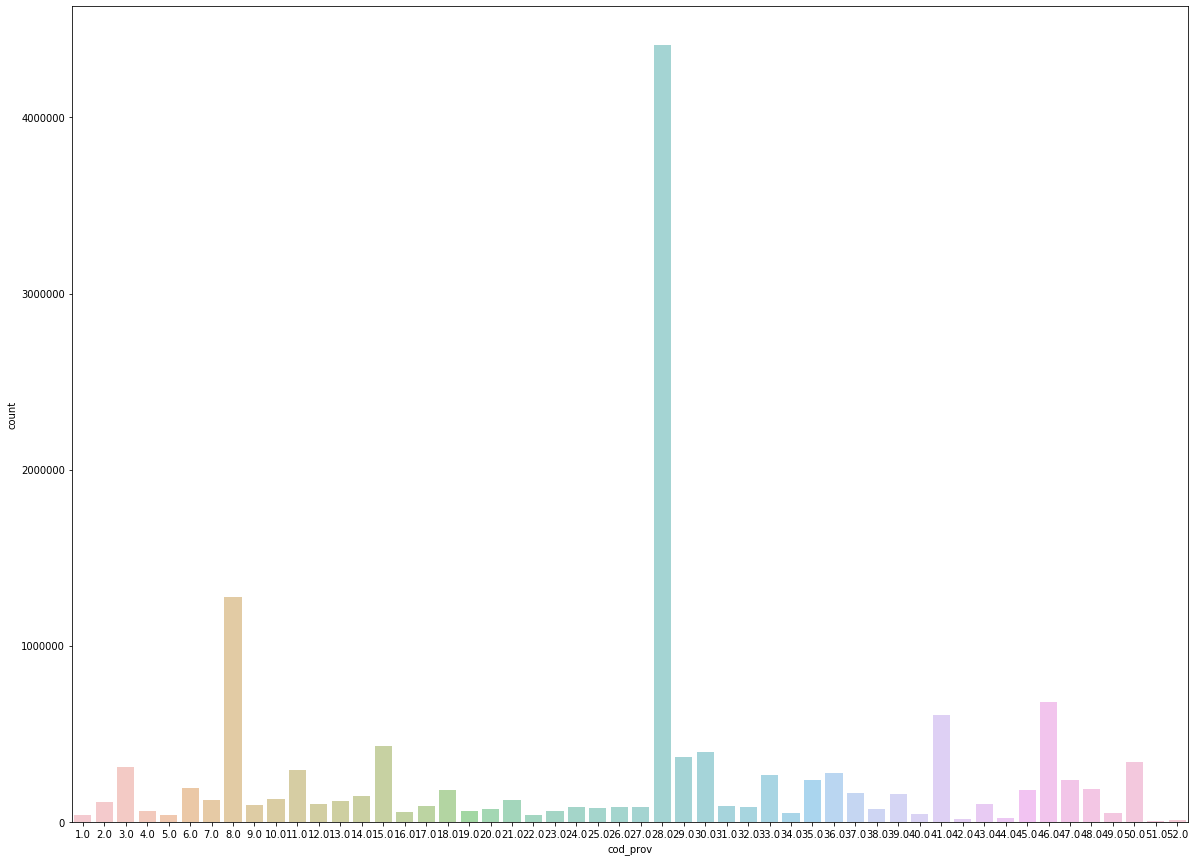

--------------------------------------------------
col :  nomprov


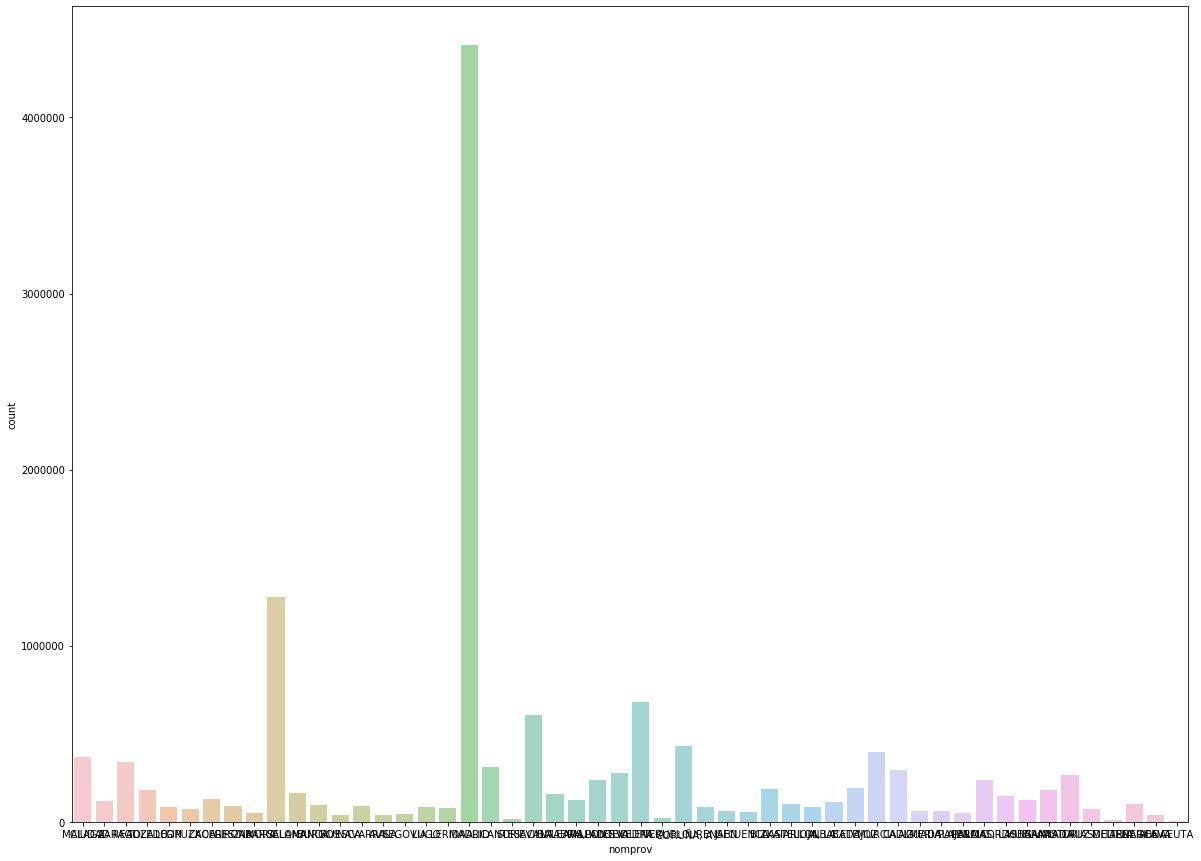

--------------------------------------------------
col :  ind_actividad_cliente


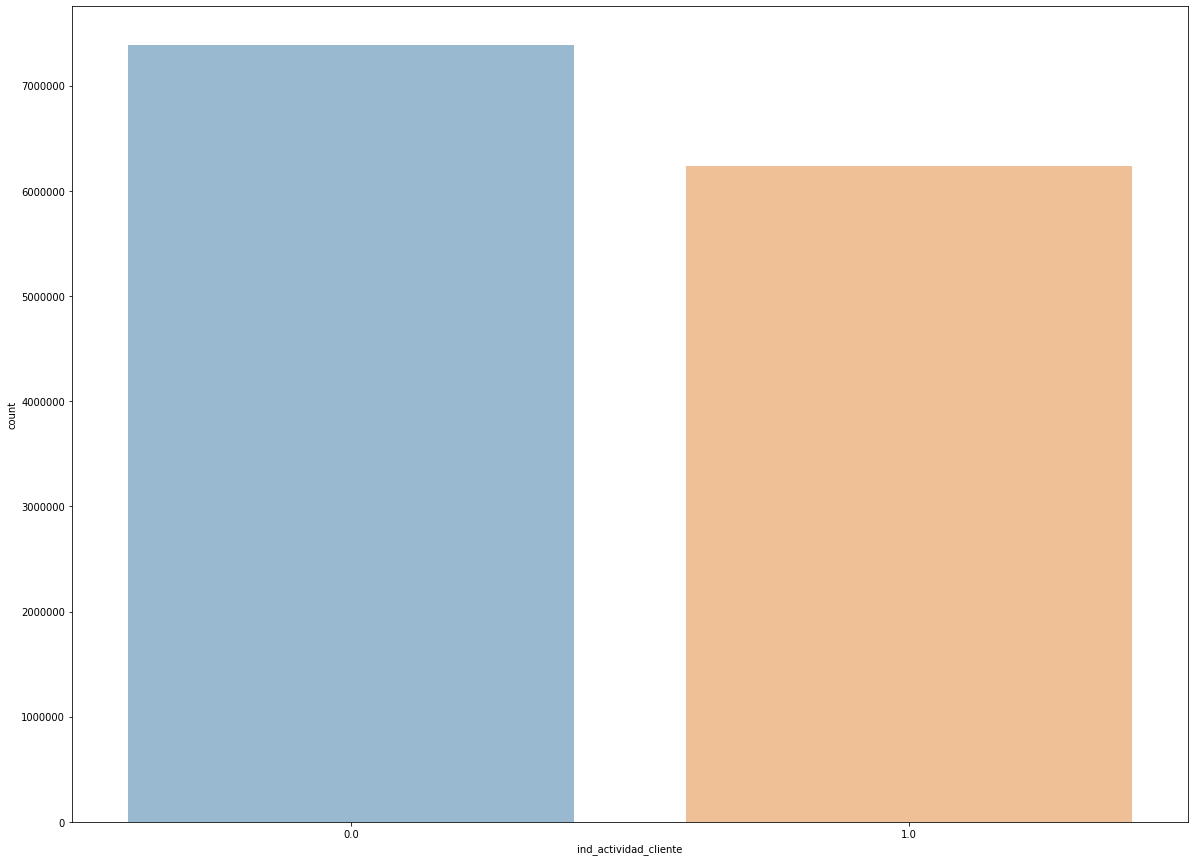

--------------------------------------------------
col :  segmento


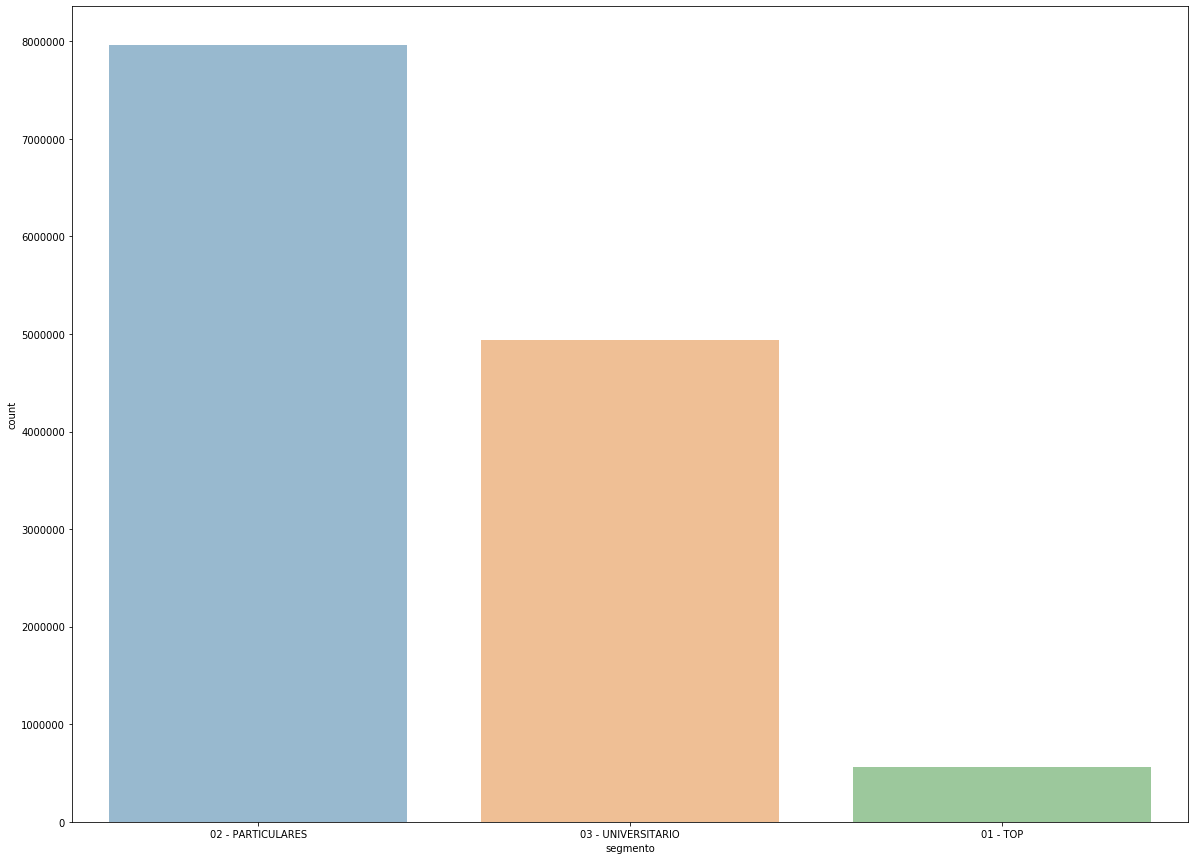

--------------------------------------------------
col :  ind_ahor_fin_ult1


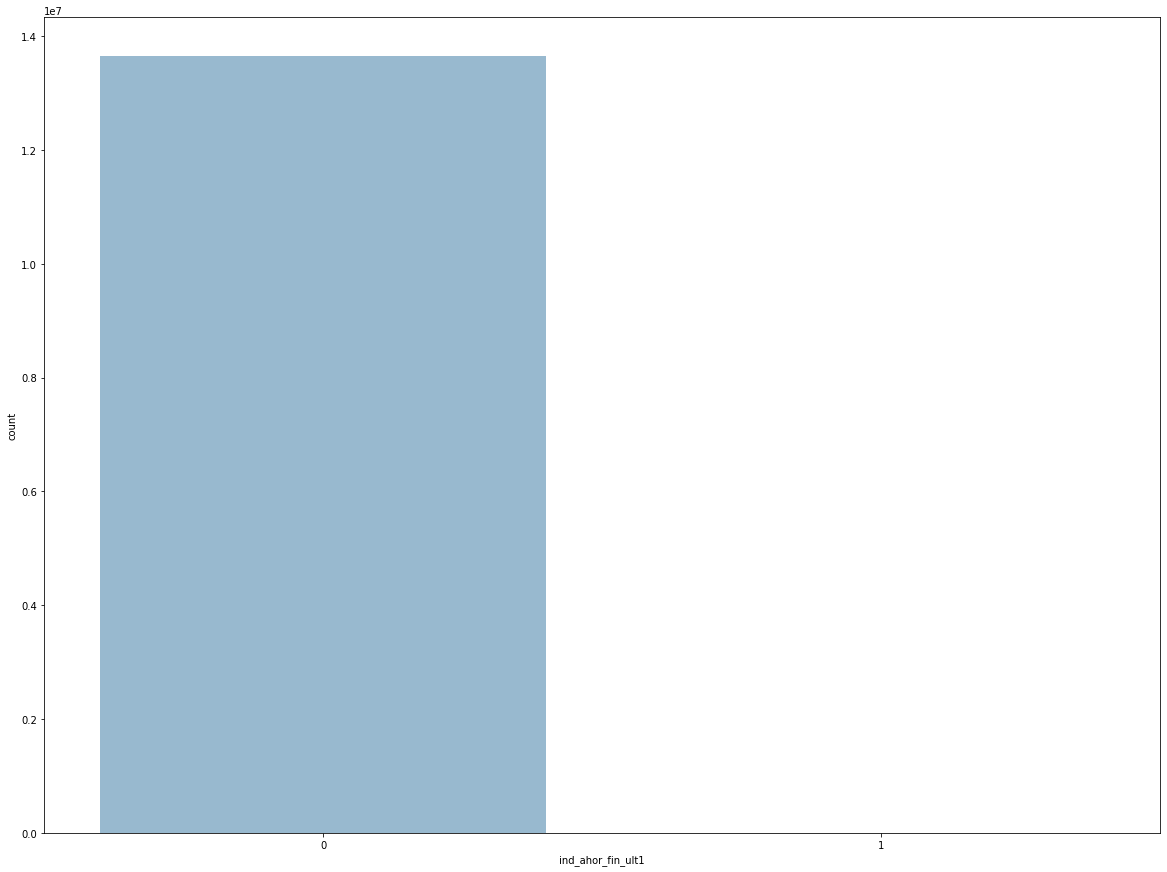

--------------------------------------------------
col :  ind_aval_fin_ult1


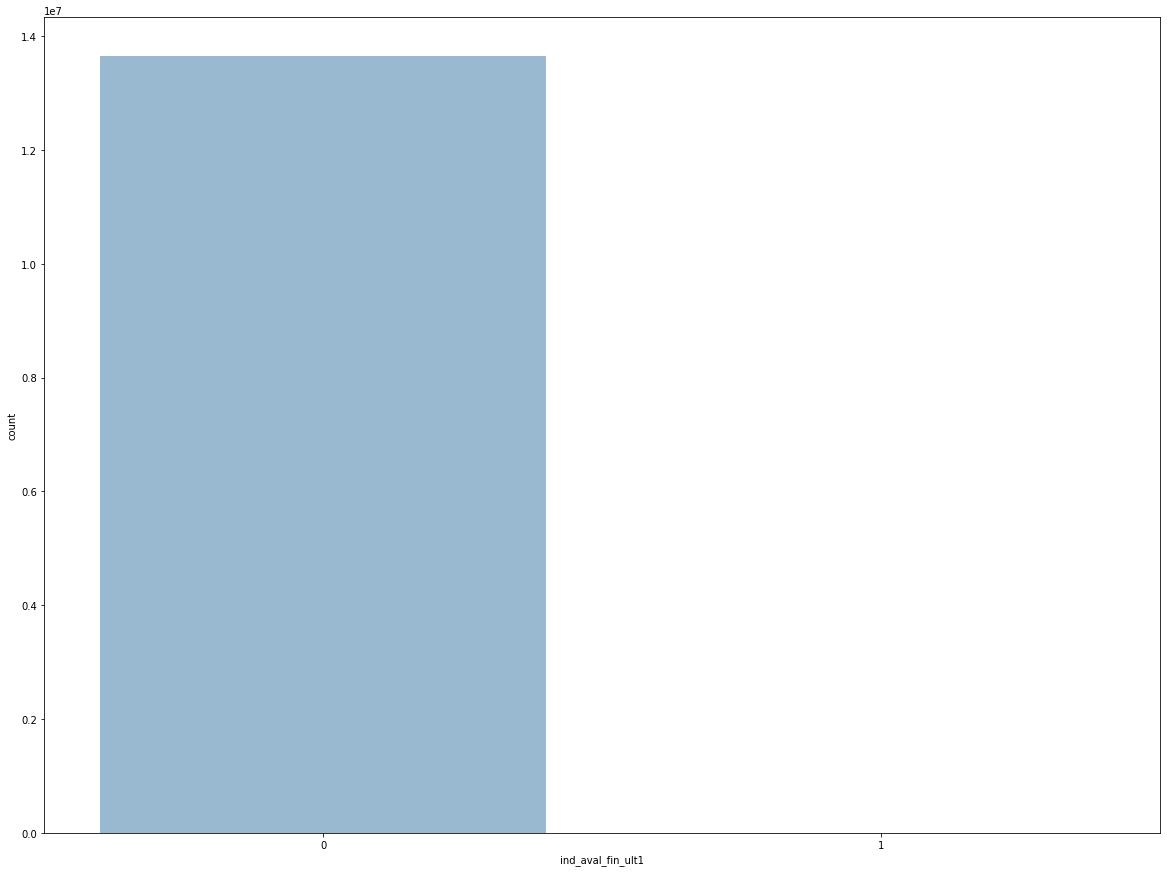

--------------------------------------------------
col :  ind_cco_fin_ult1


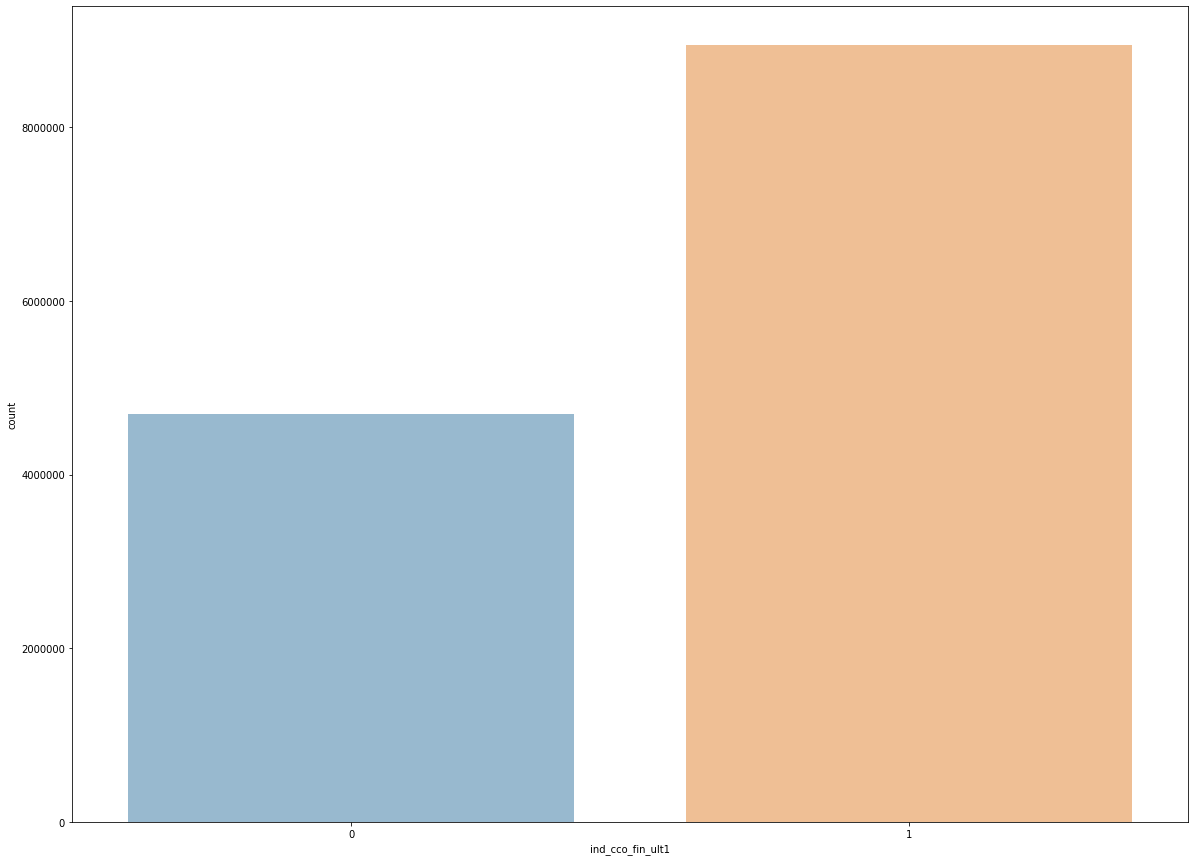

--------------------------------------------------
col :  ind_cder_fin_ult1


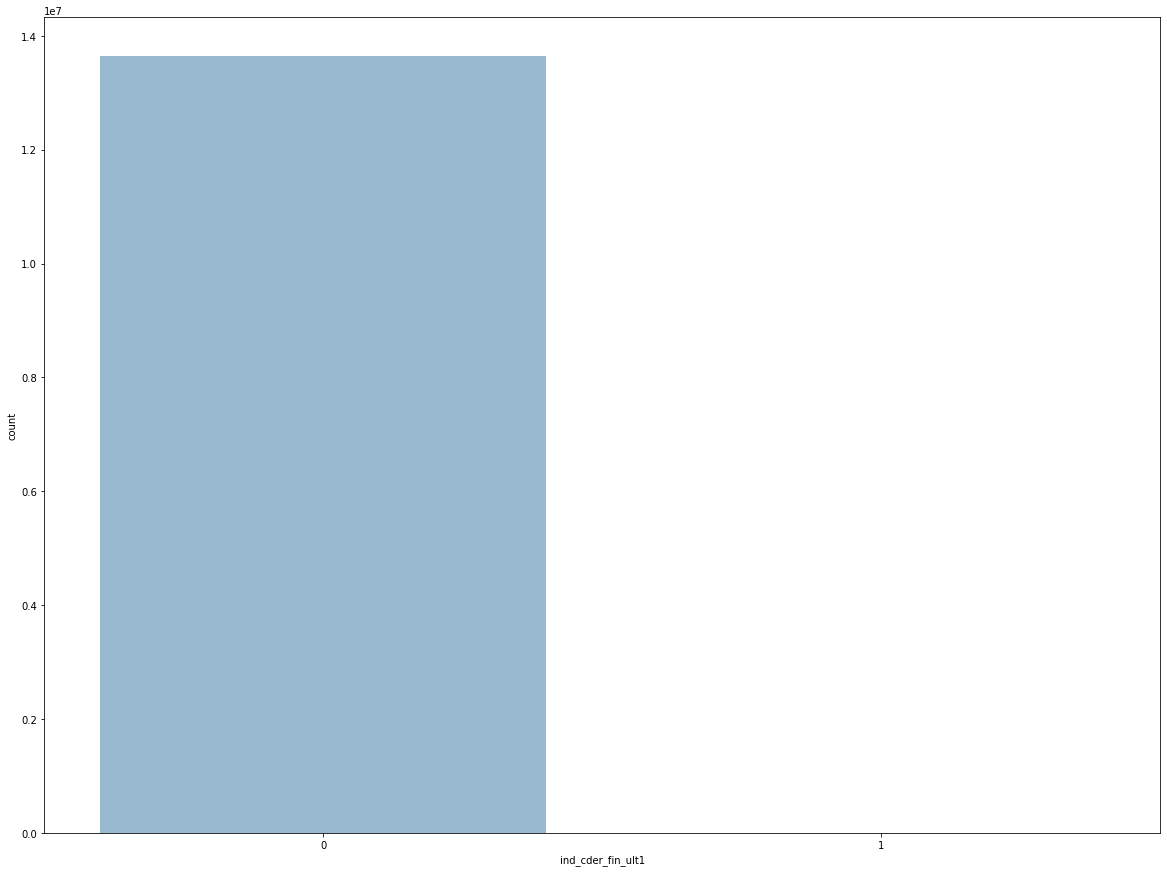

--------------------------------------------------
col :  ind_cno_fin_ult1


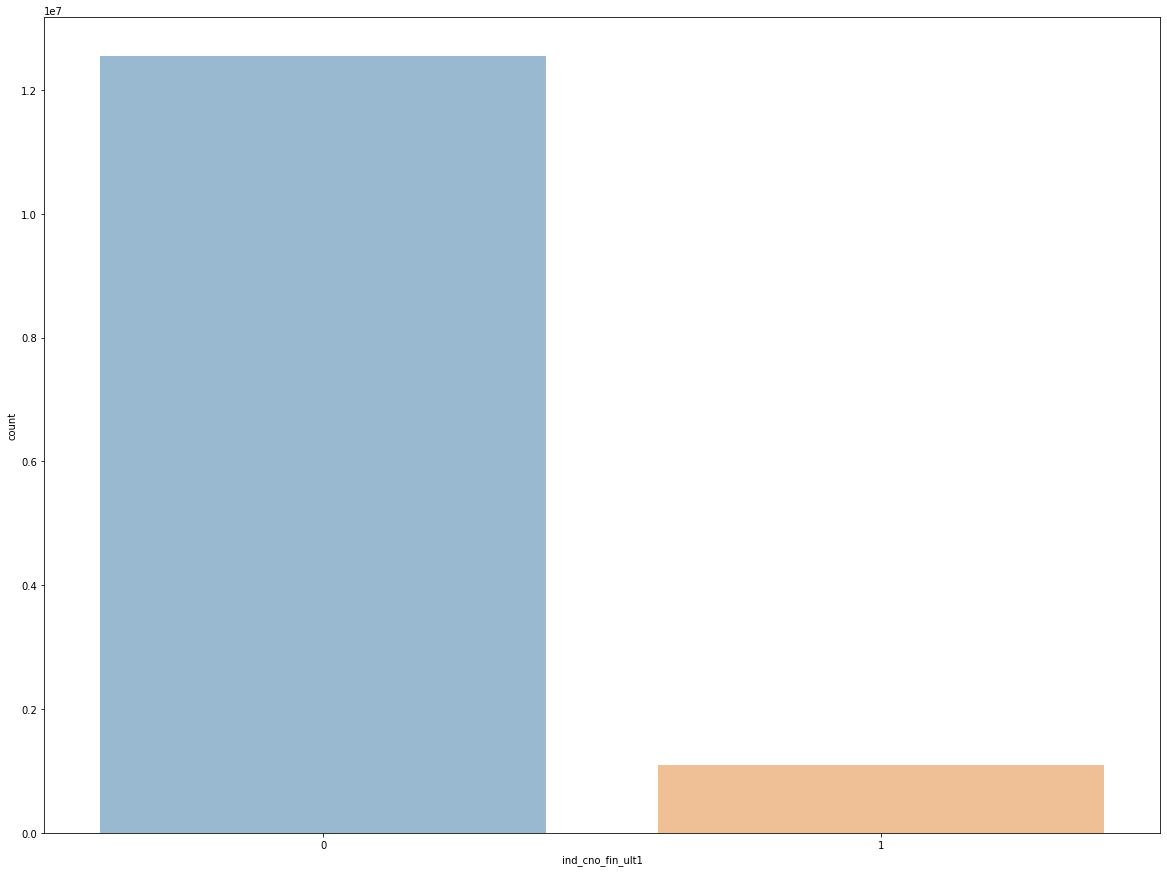

--------------------------------------------------
col :  ind_ctju_fin_ult1


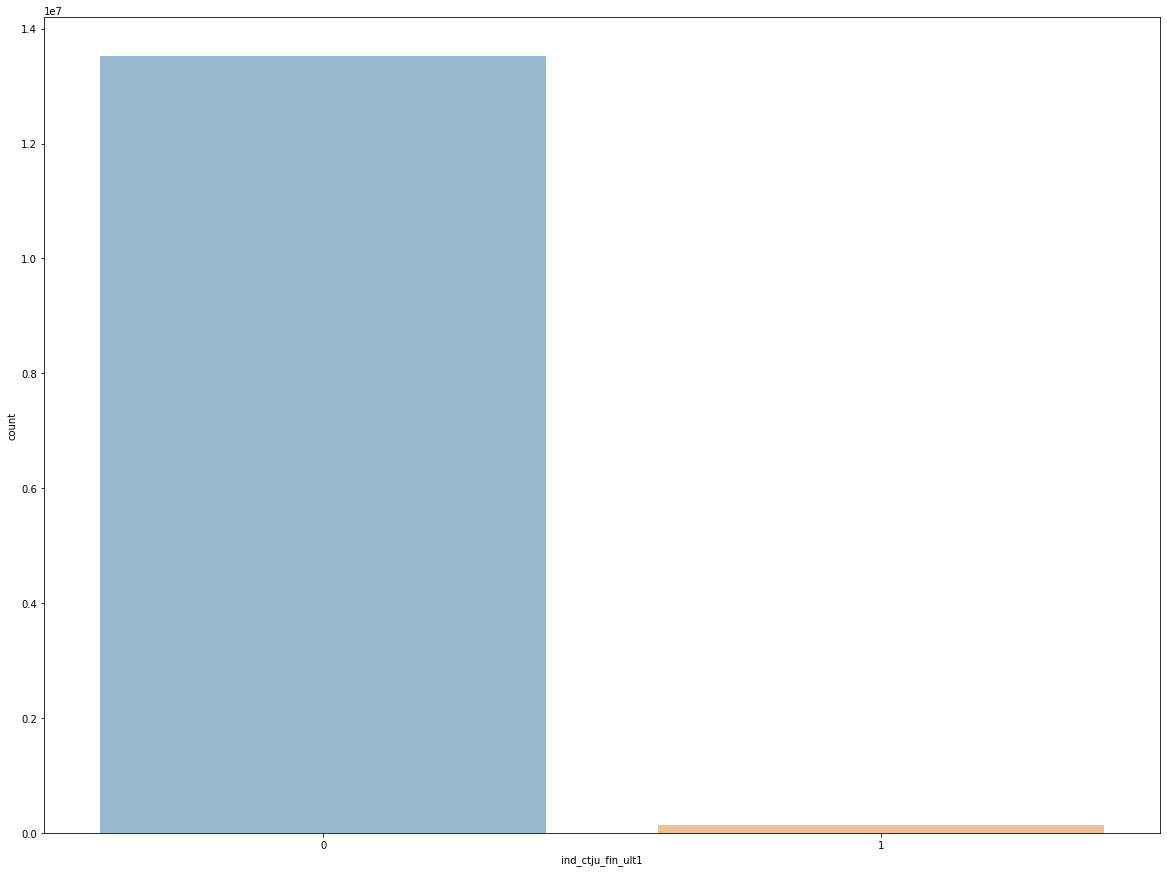

--------------------------------------------------
col :  ind_ctma_fin_ult1


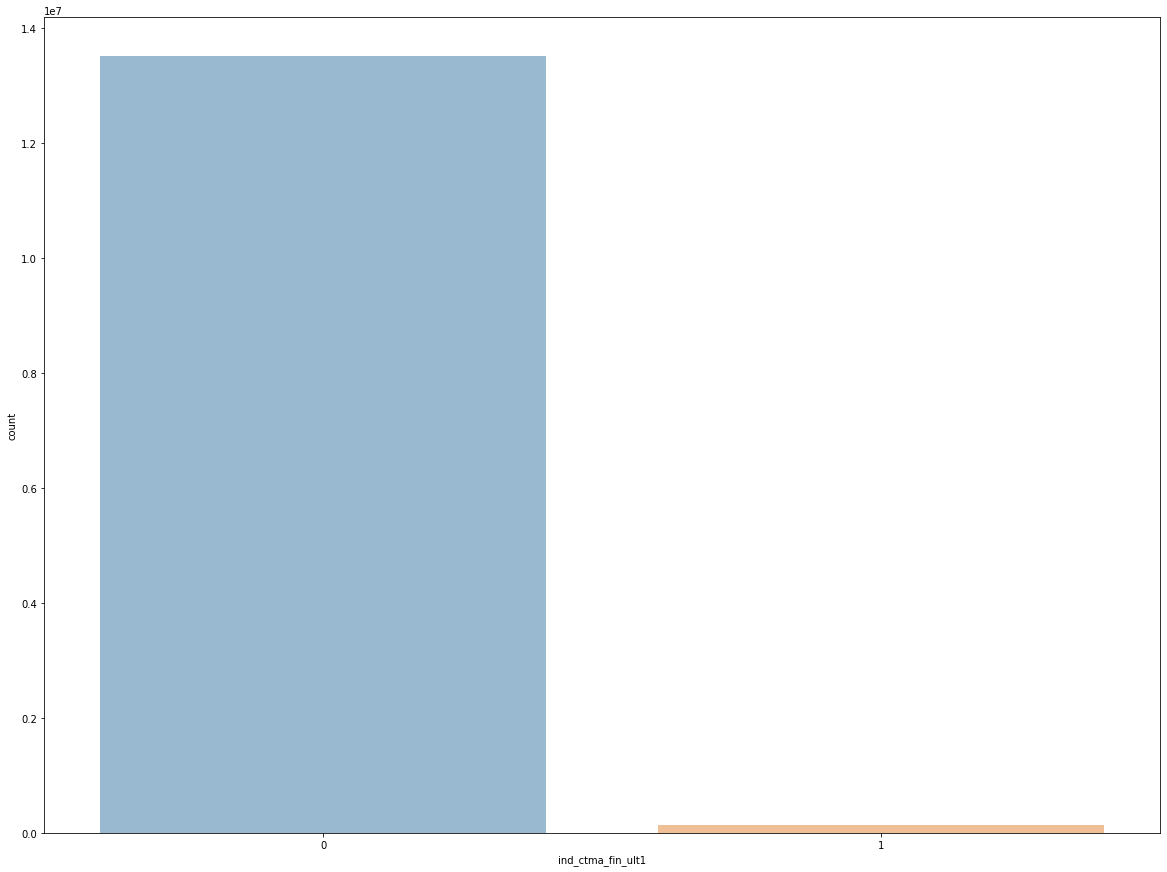

--------------------------------------------------
col :  ind_ctop_fin_ult1


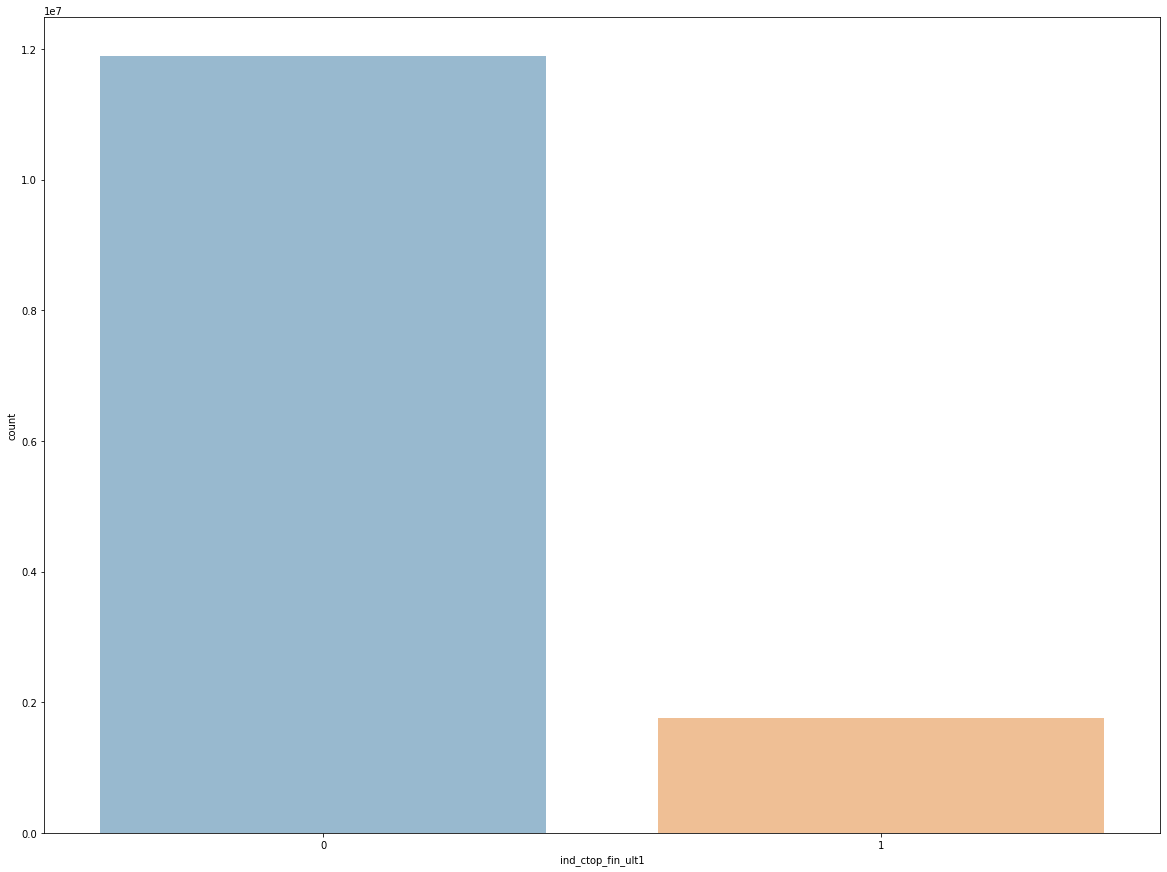

--------------------------------------------------
col :  ind_ctpp_fin_ult1


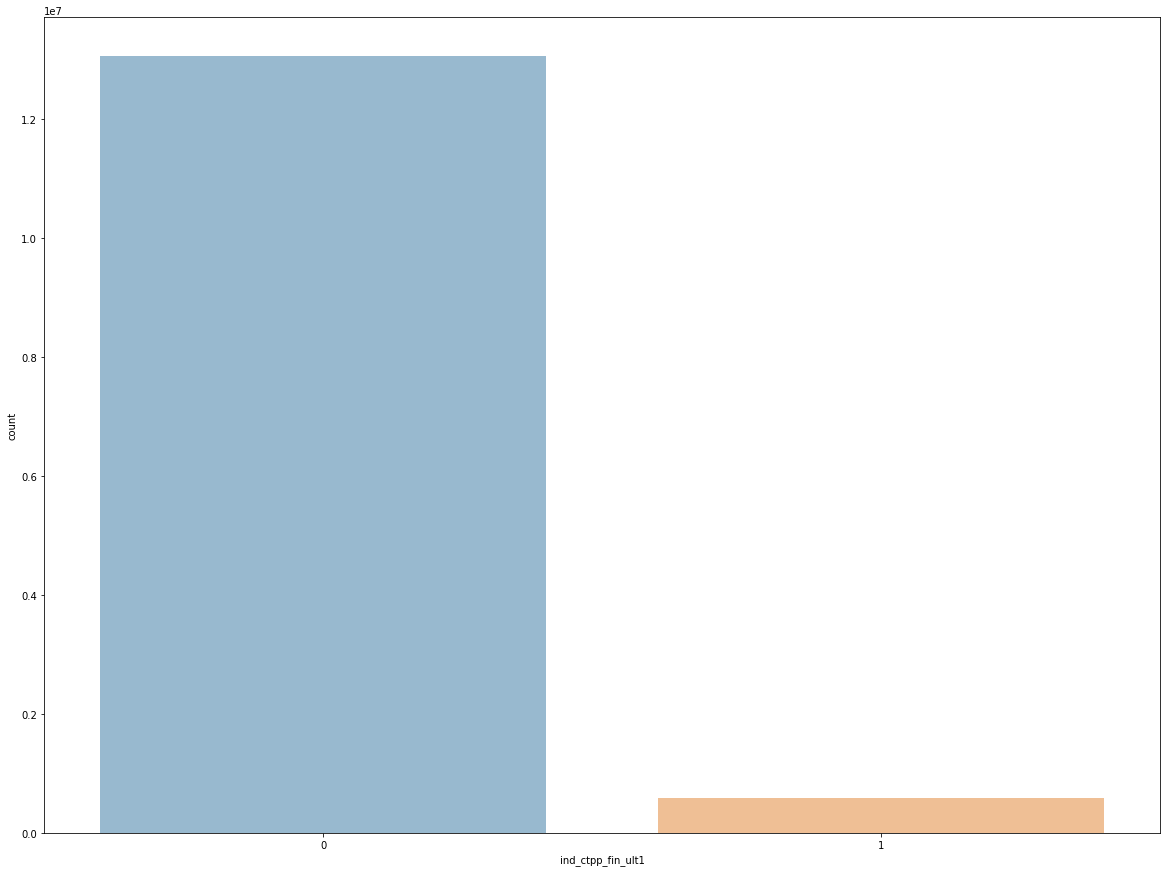

--------------------------------------------------
col :  ind_deco_fin_ult1


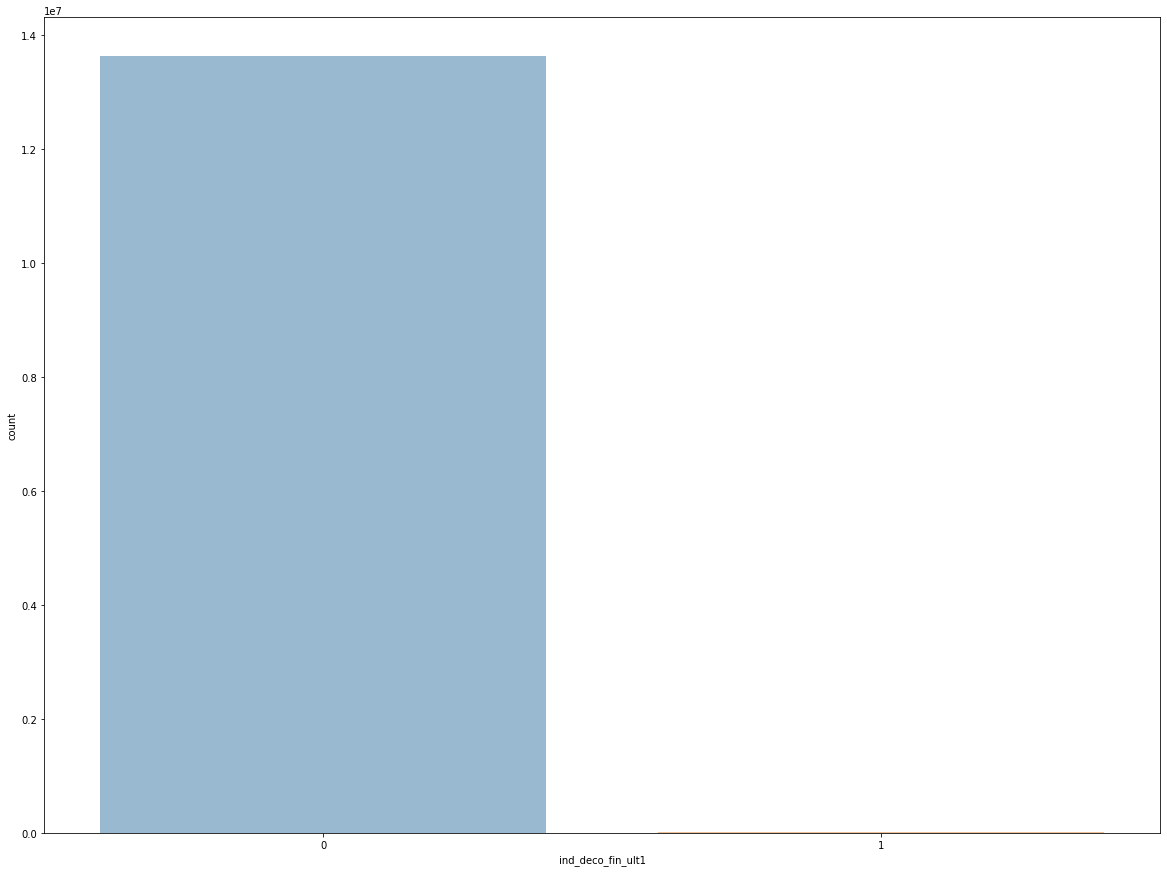

--------------------------------------------------
col :  ind_deme_fin_ult1


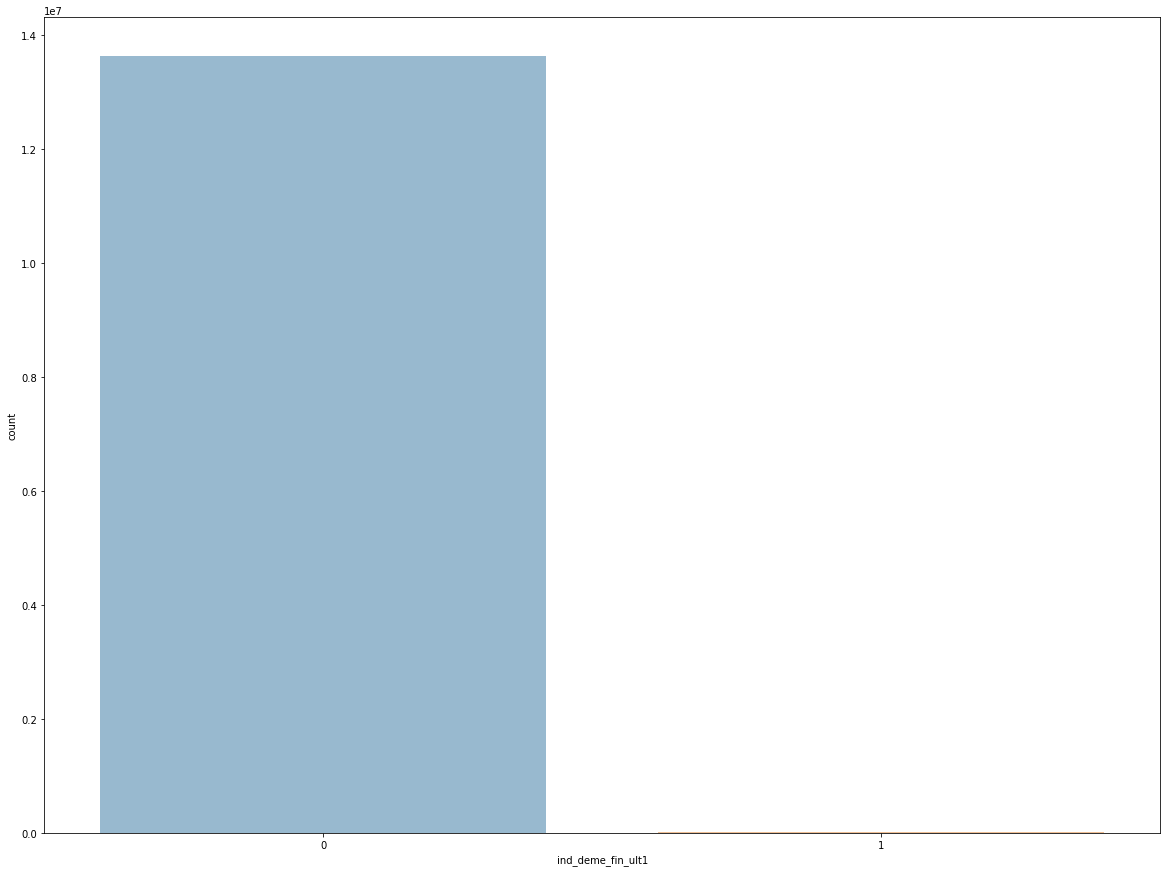

--------------------------------------------------
col :  ind_dela_fin_ult1


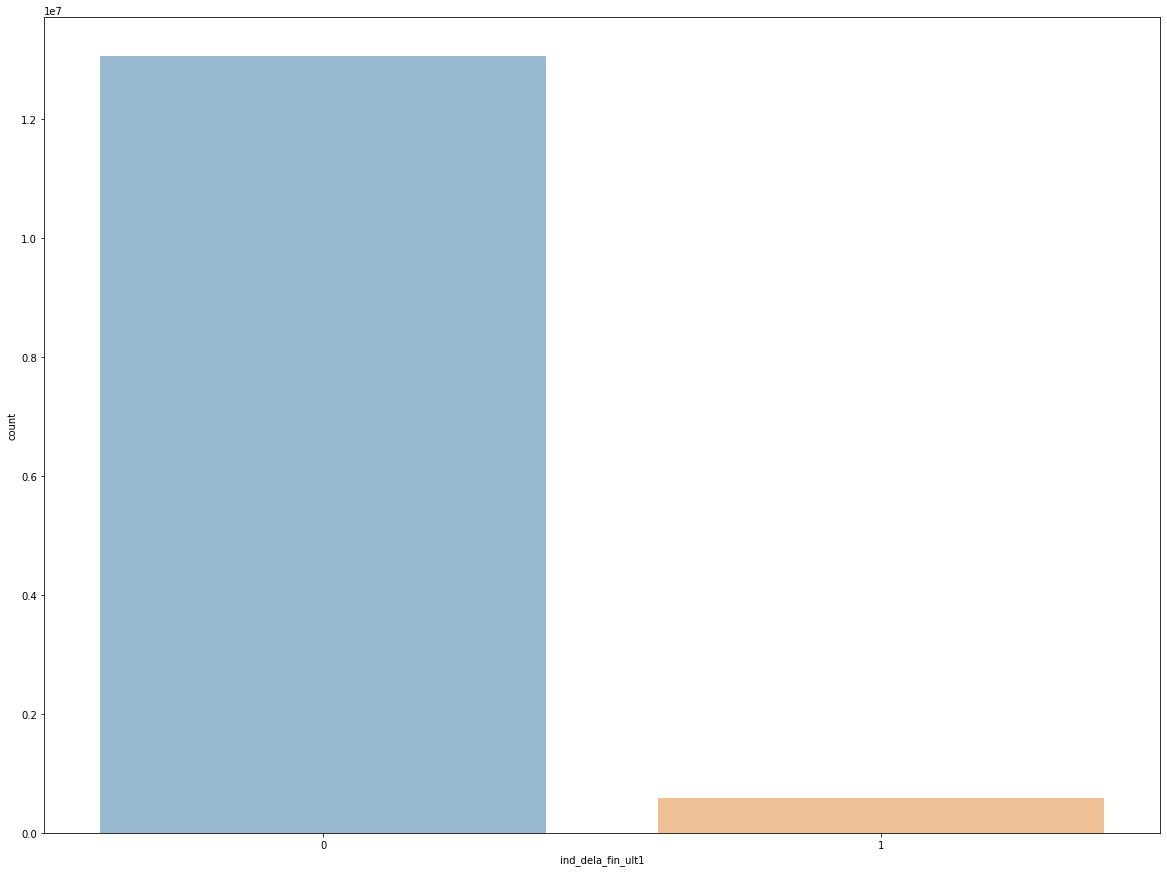

--------------------------------------------------
col :  ind_ecue_fin_ult1


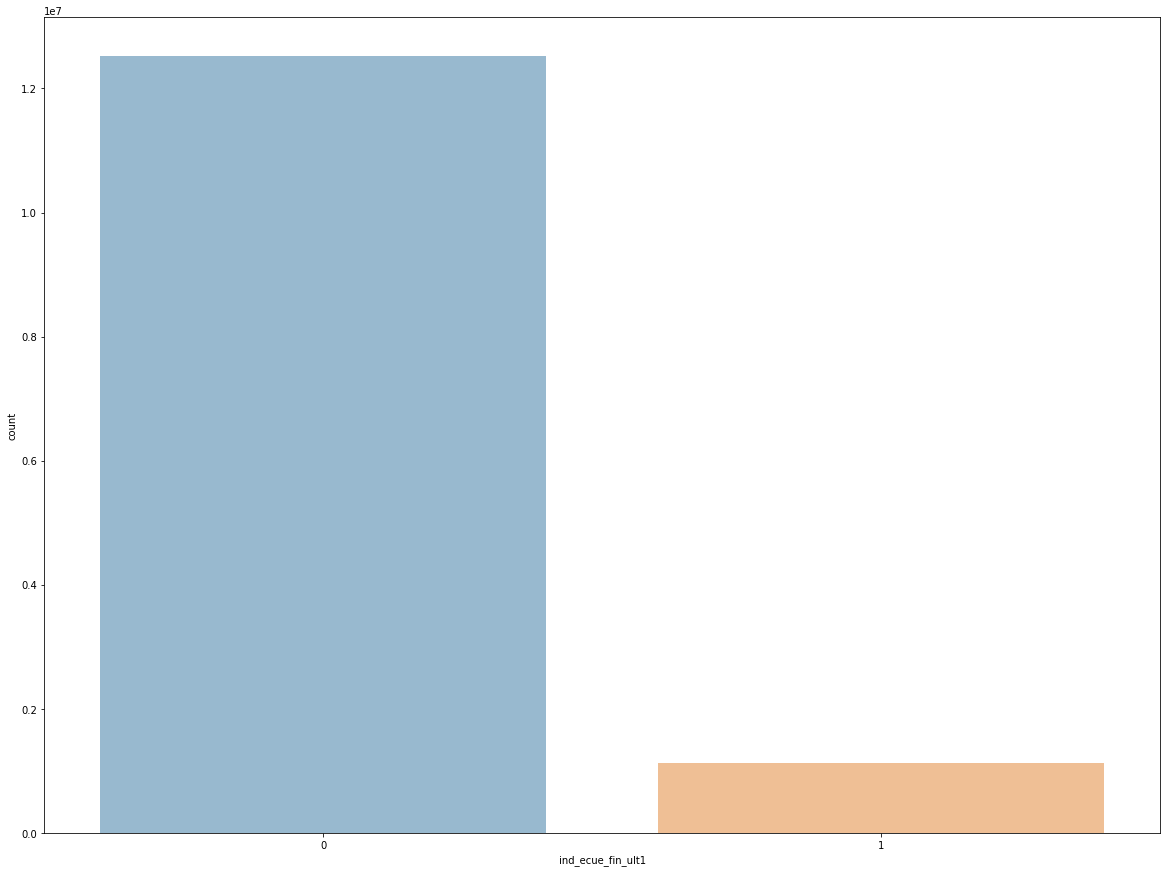

--------------------------------------------------
col :  ind_fond_fin_ult1


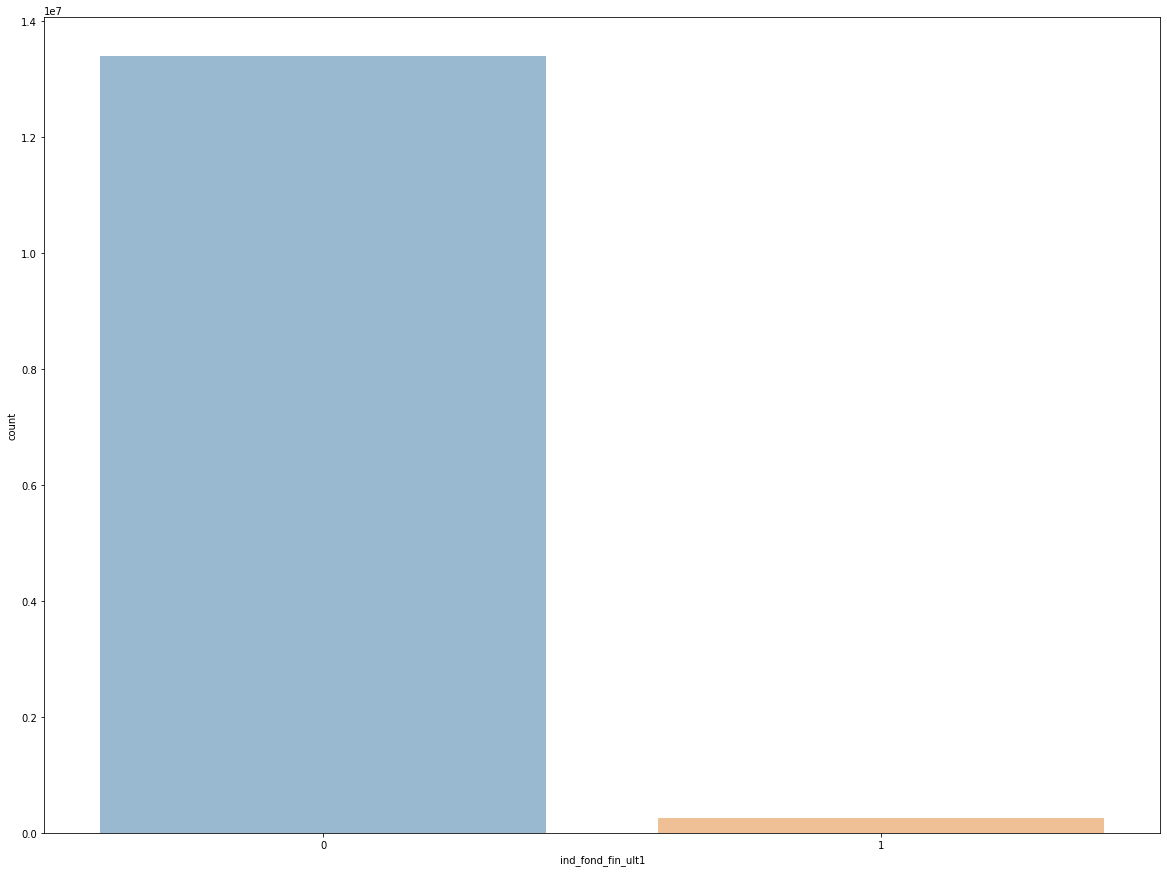

--------------------------------------------------
col :  ind_hip_fin_ult1


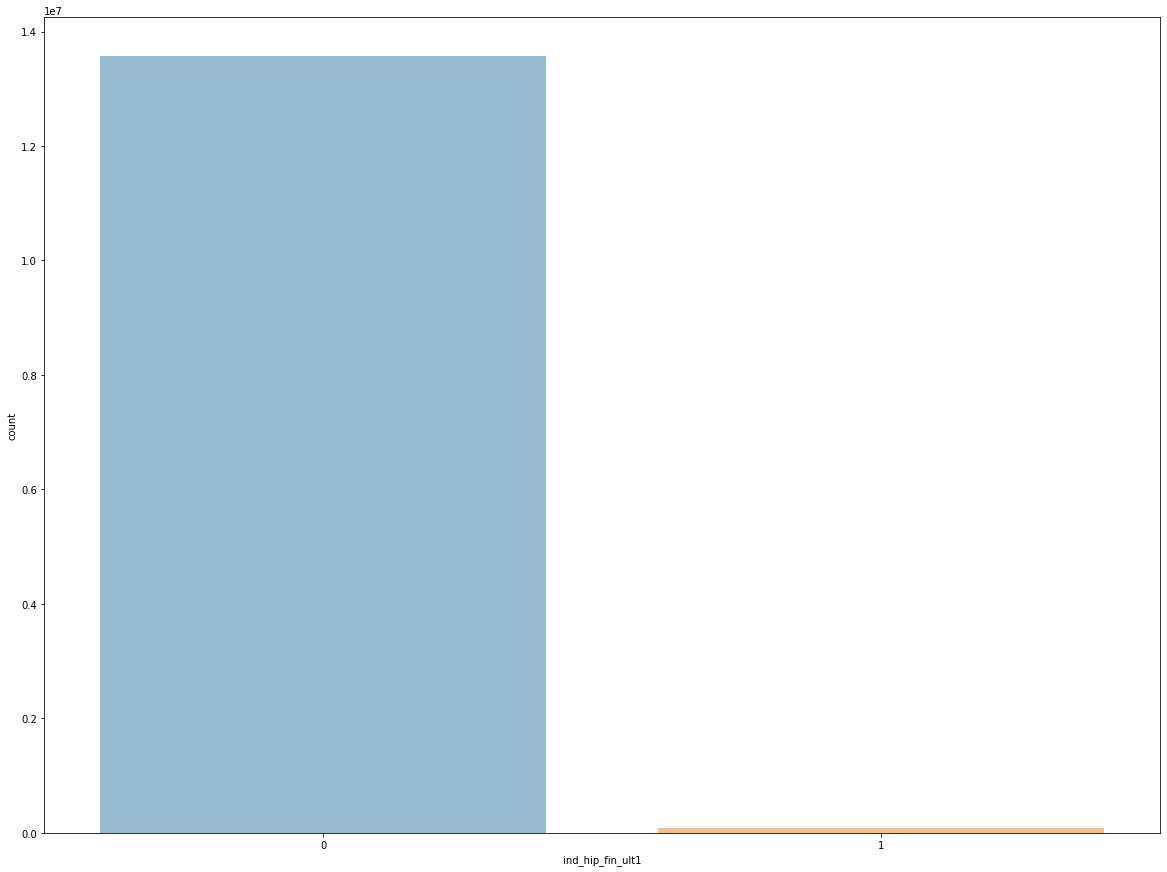

--------------------------------------------------
col :  ind_plan_fin_ult1


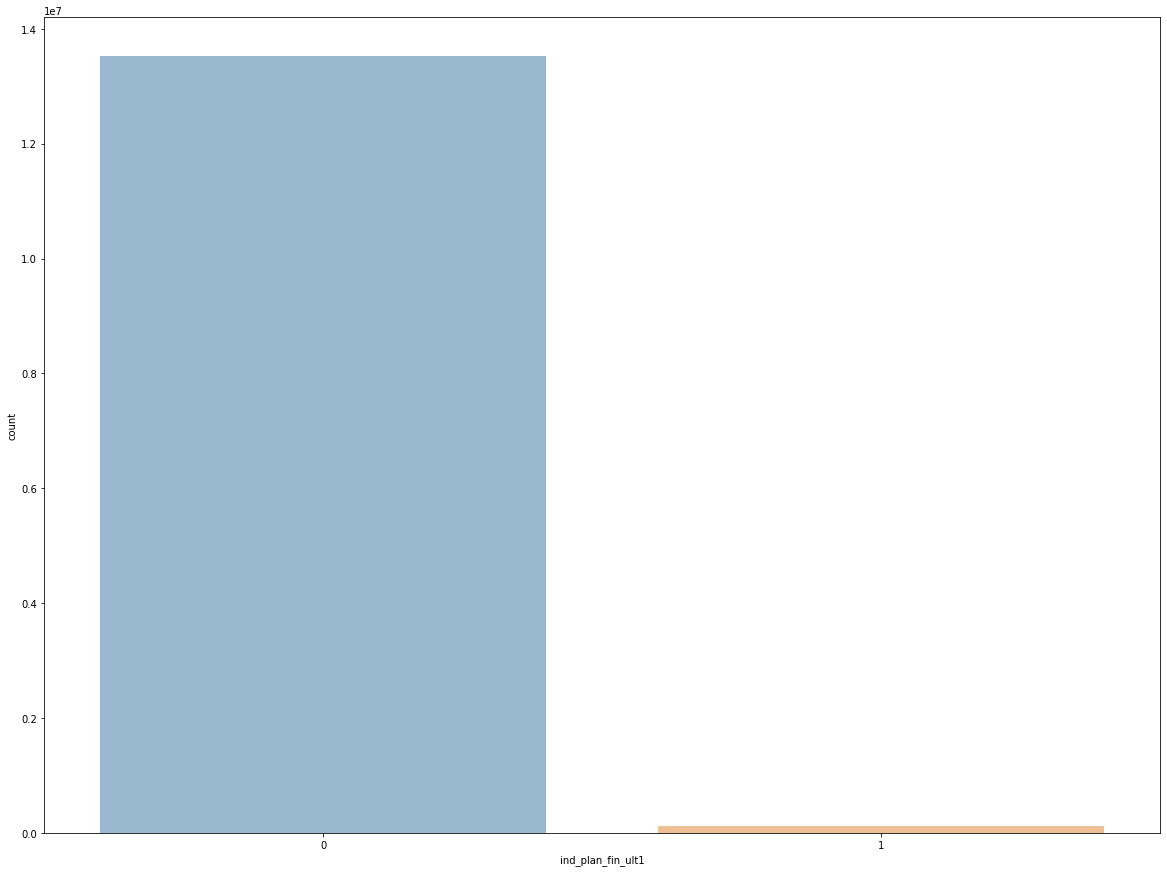

--------------------------------------------------
col :  ind_pres_fin_ult1


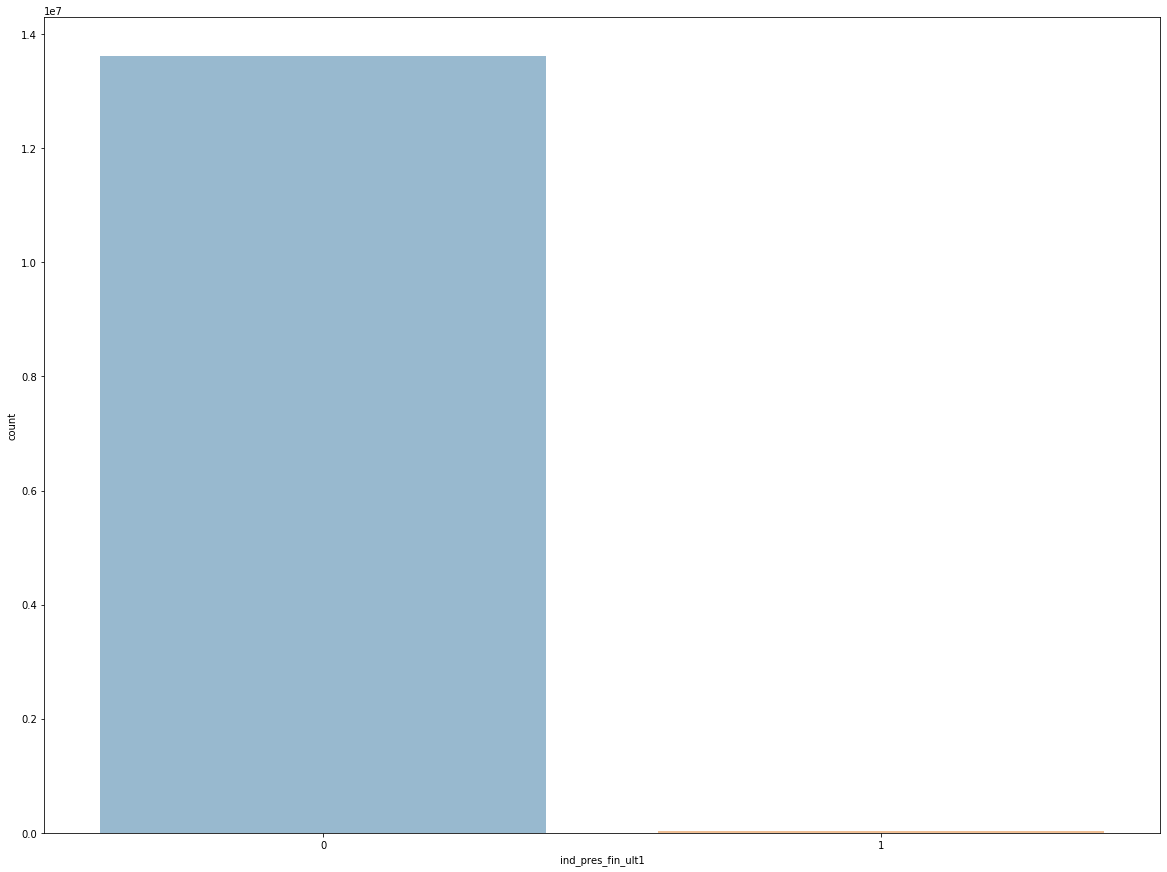

--------------------------------------------------
col :  ind_reca_fin_ult1


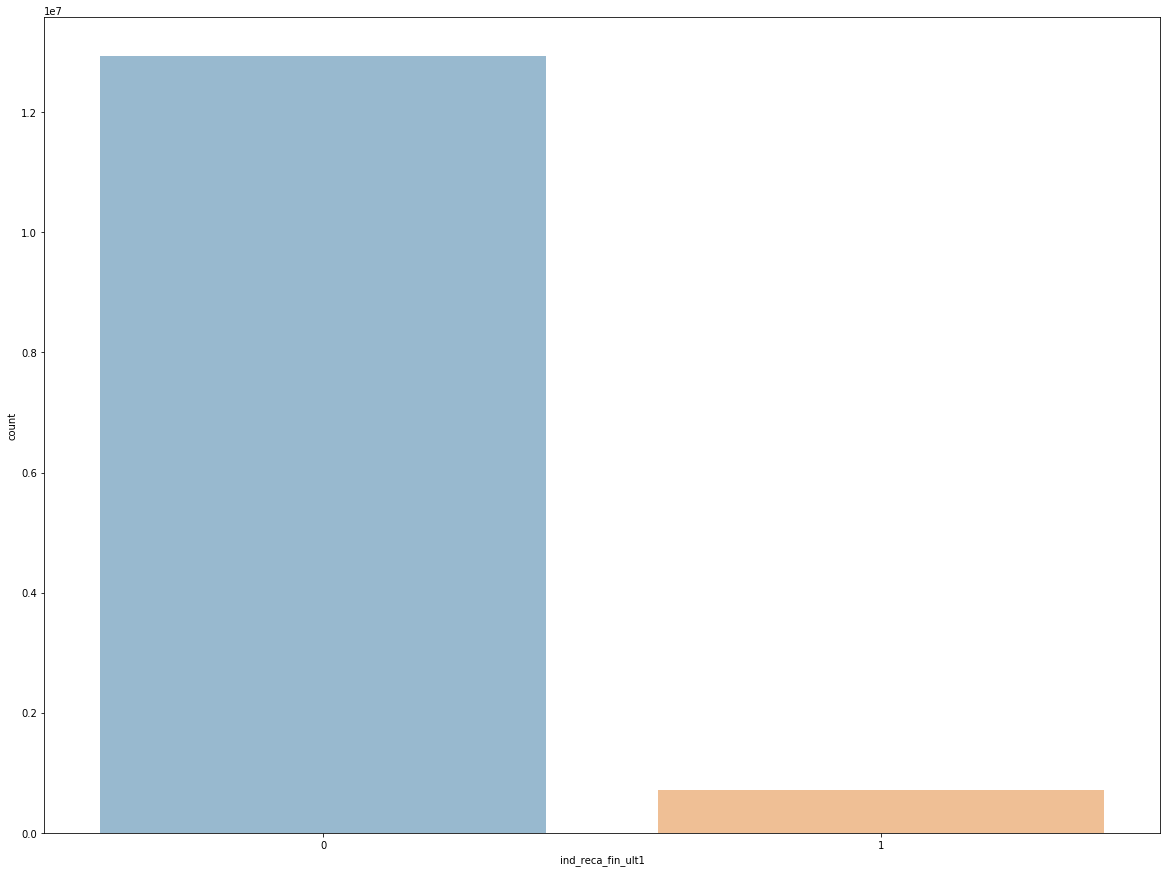

--------------------------------------------------
col :  ind_tjcr_fin_ult1


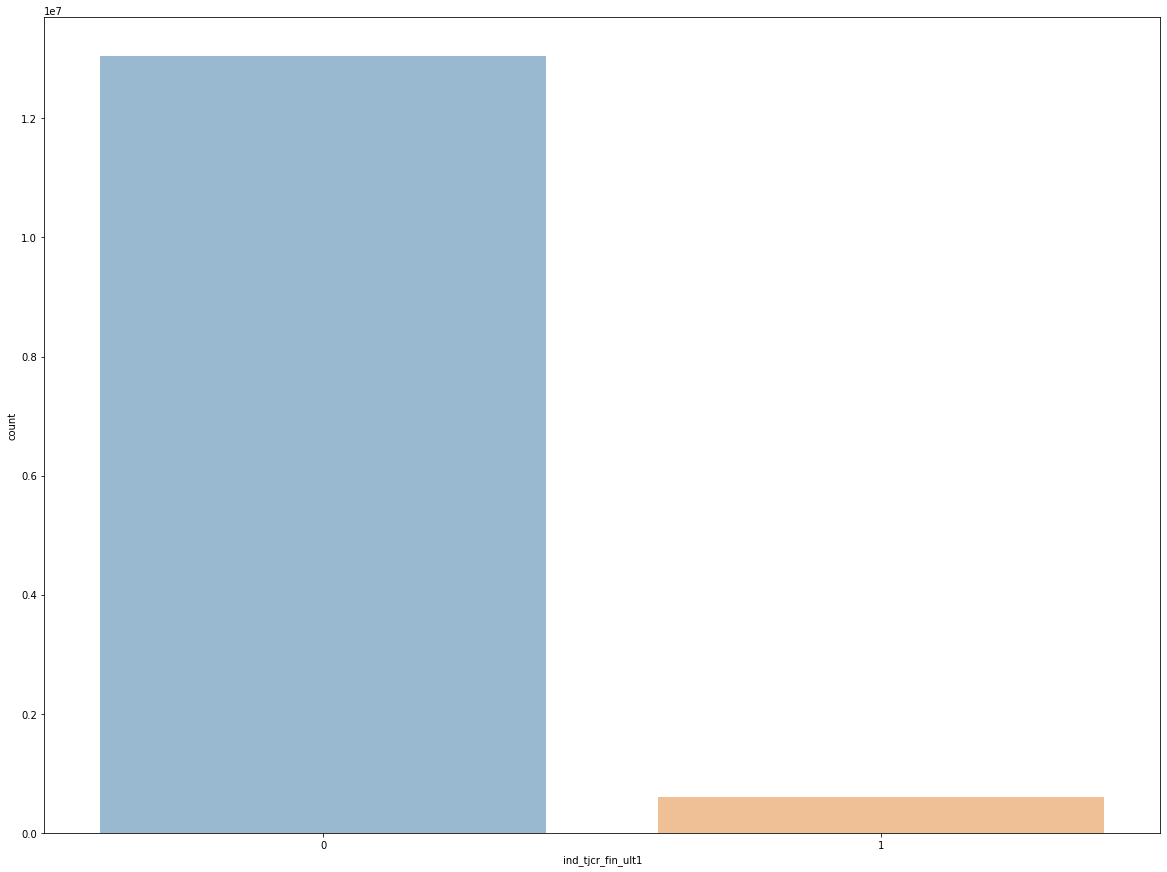

--------------------------------------------------
col :  ind_valo_fin_ult1


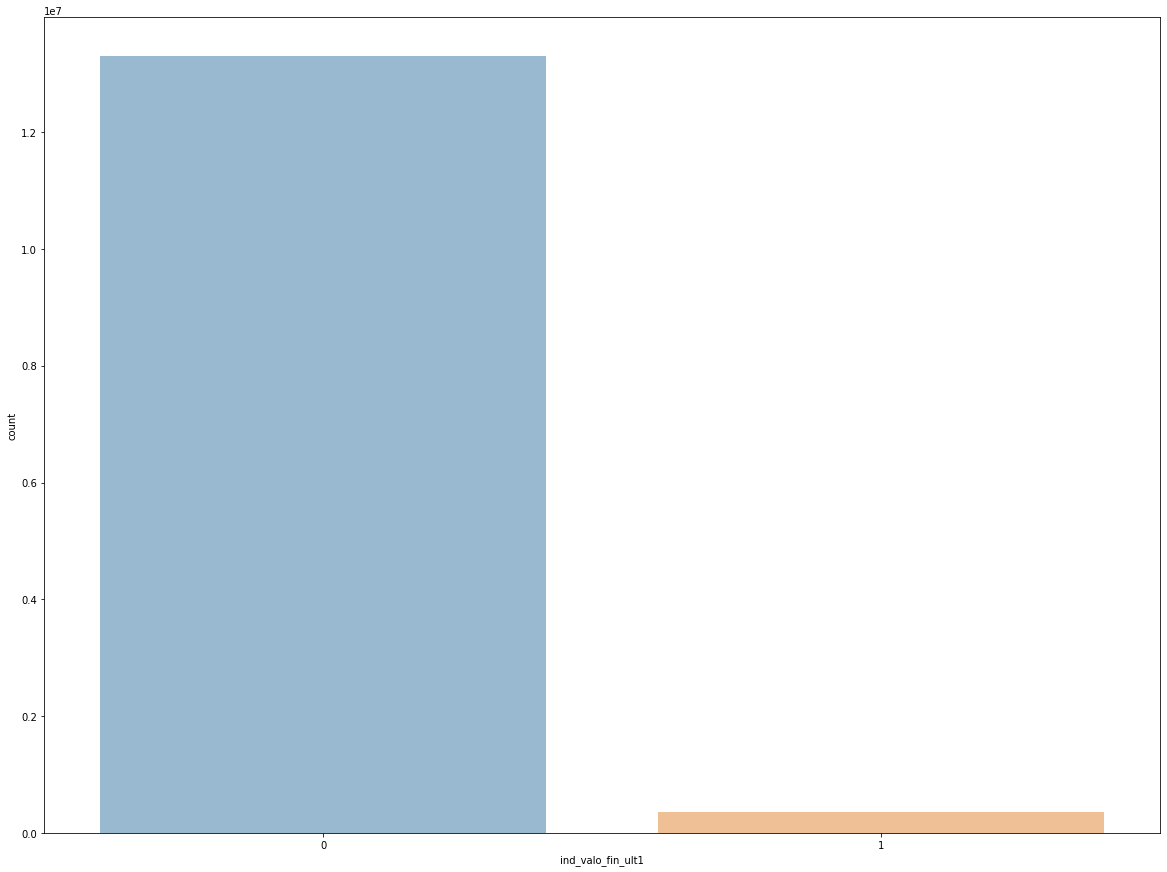

--------------------------------------------------
col :  ind_viv_fin_ult1


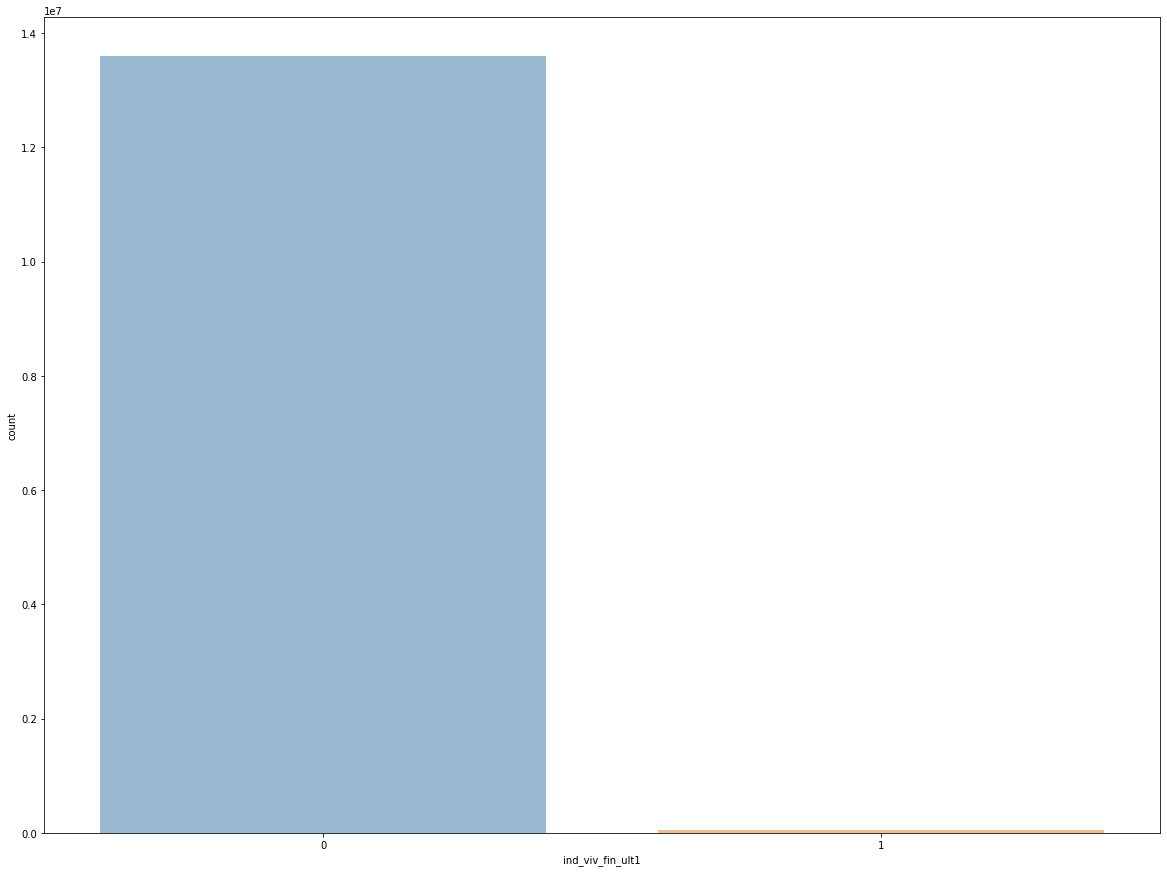

--------------------------------------------------
col :  ind_nomina_ult1


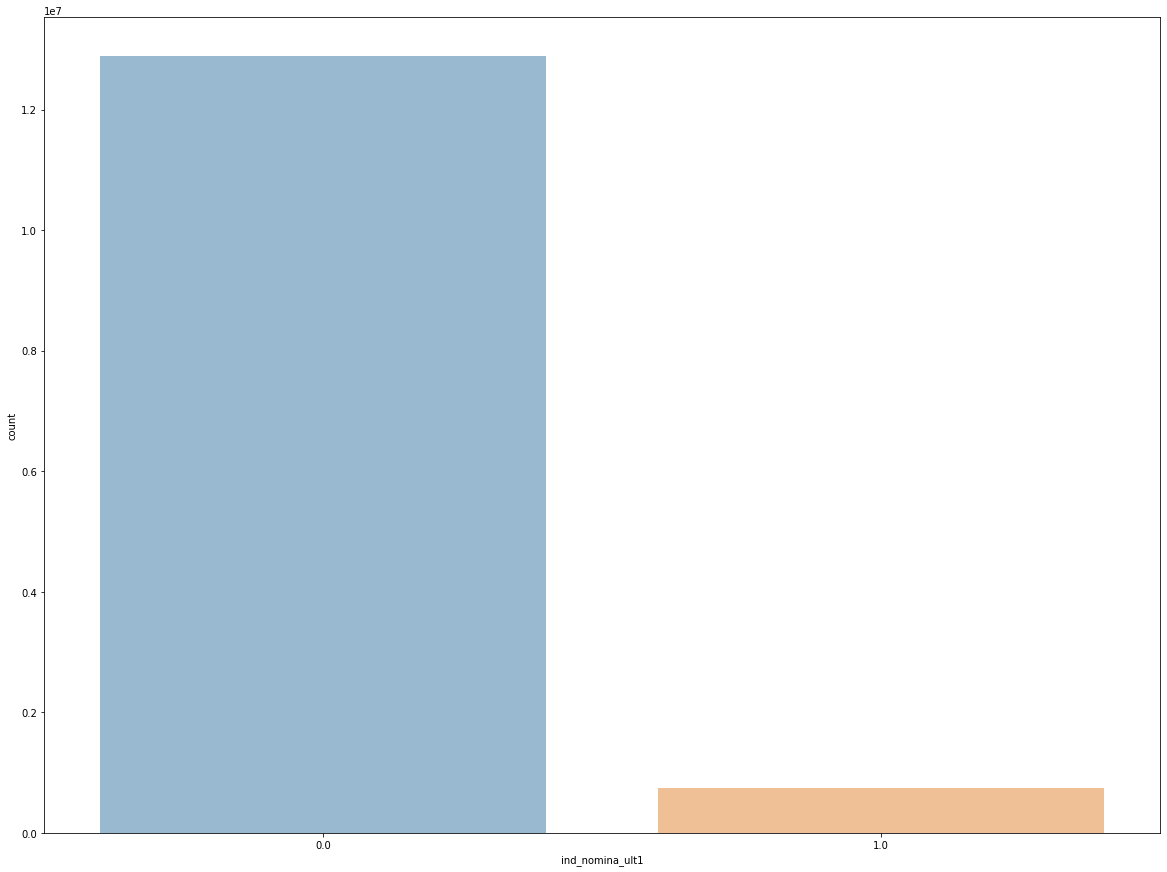

--------------------------------------------------
col :  ind_nom_pens_ult1


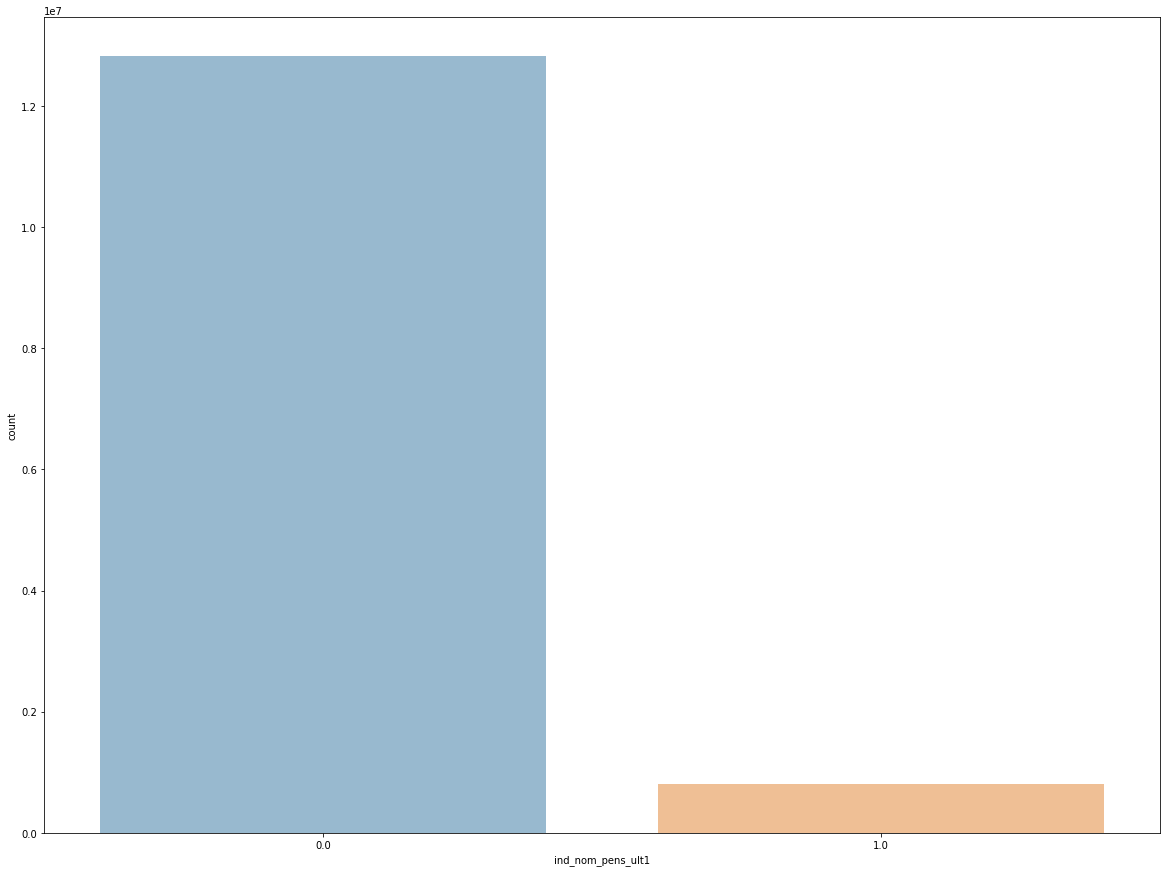

--------------------------------------------------
col :  ind_recibo_ult1


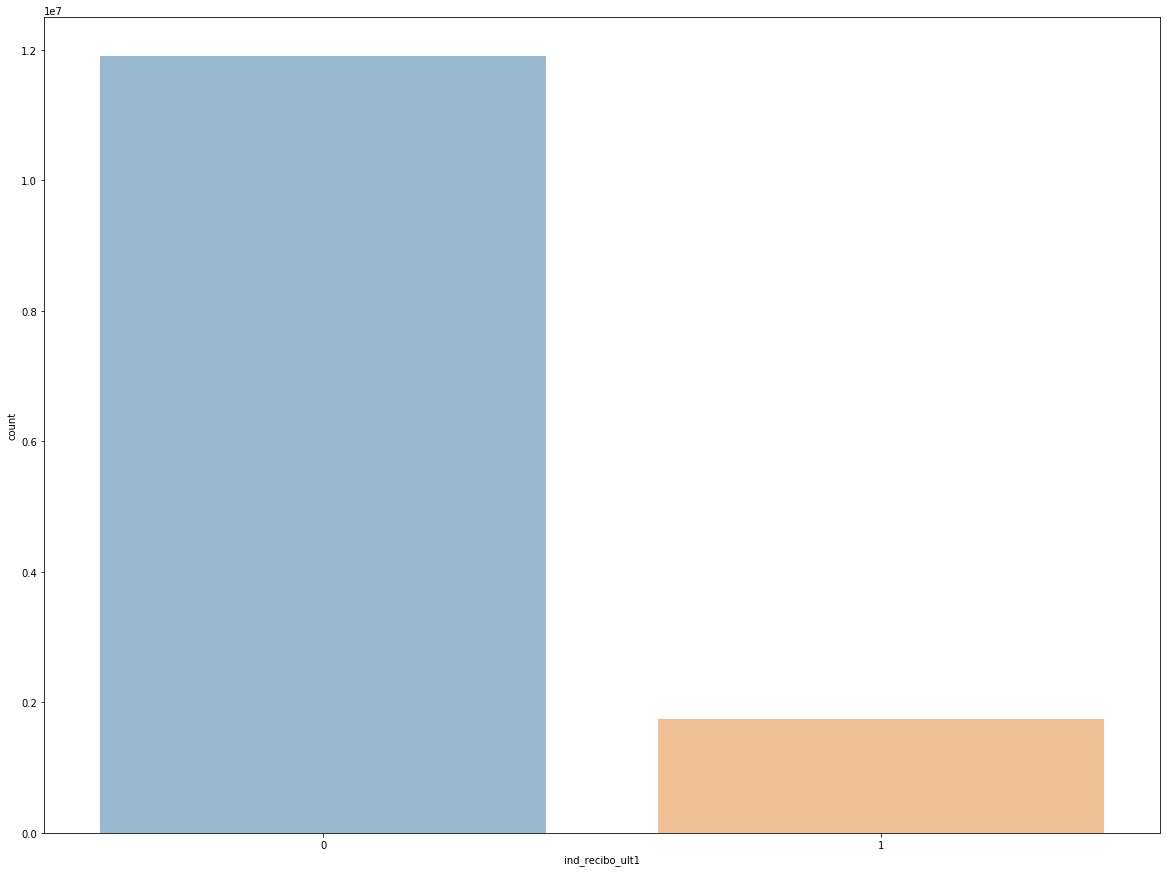

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

skip_cols  = ['ncodpers', 'renta']
for col in df.columns:
    if col in skip_cols:
        continue
        
    print('-'* 50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=df, alpha=0.5)
    plt.show()

### 누적 막대그래프를 이용한 월별 금융 제품 보유 데이터 시각화

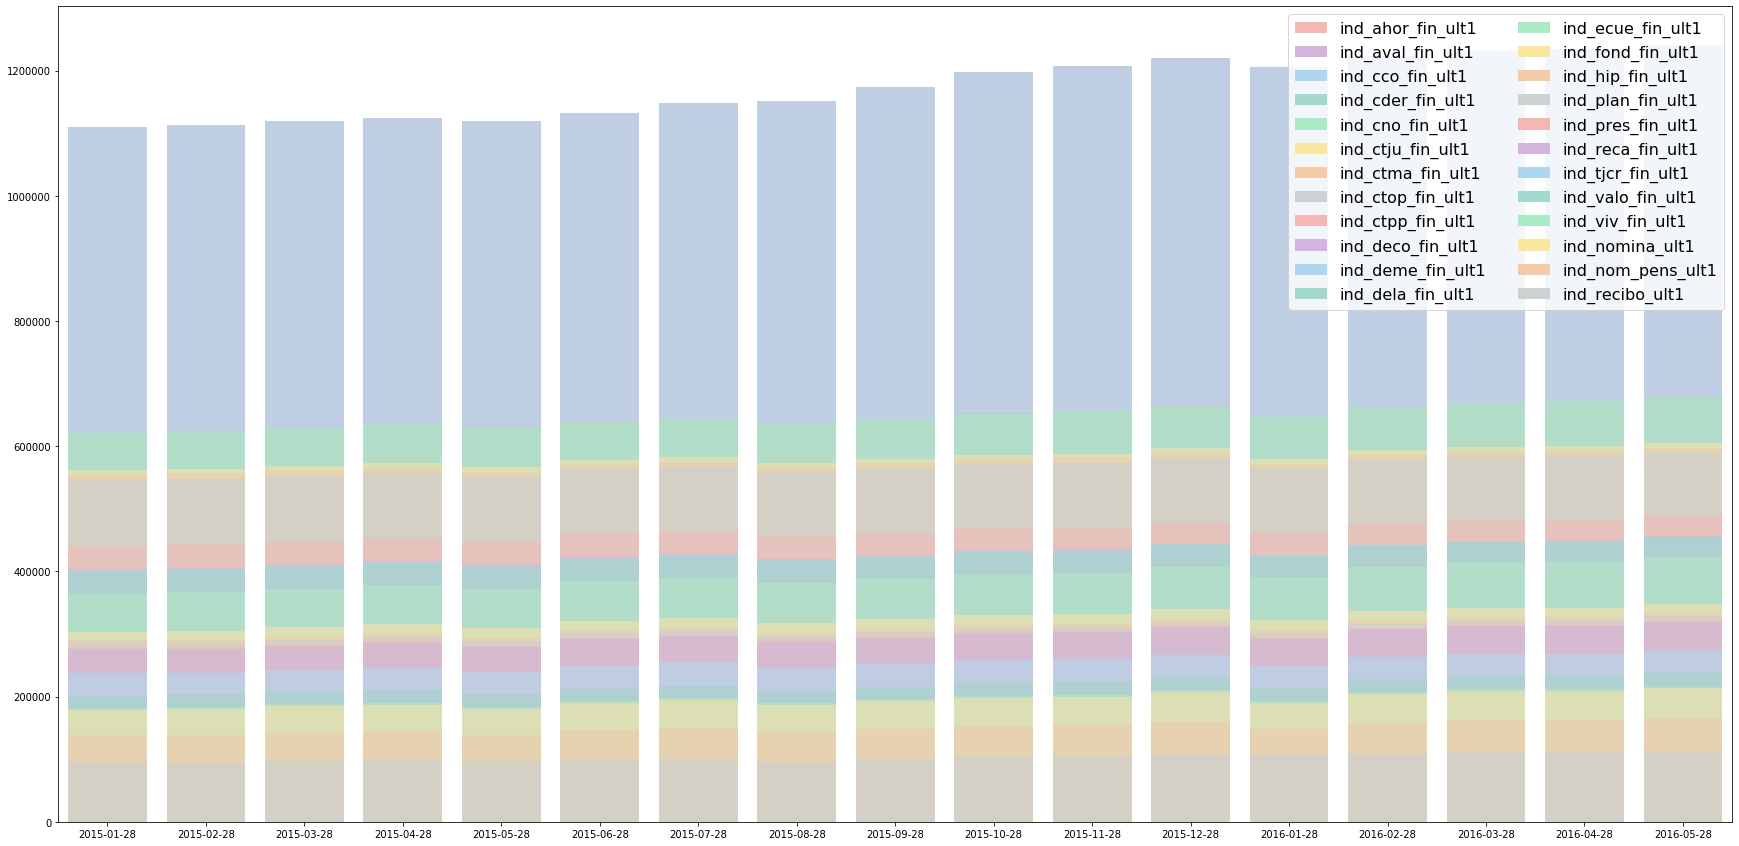

In [21]:
months = df['fecha_dato'].unique().tolist()

label_cols = df.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
    label_sum = df.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size': 16})

### 상대값을 시각화

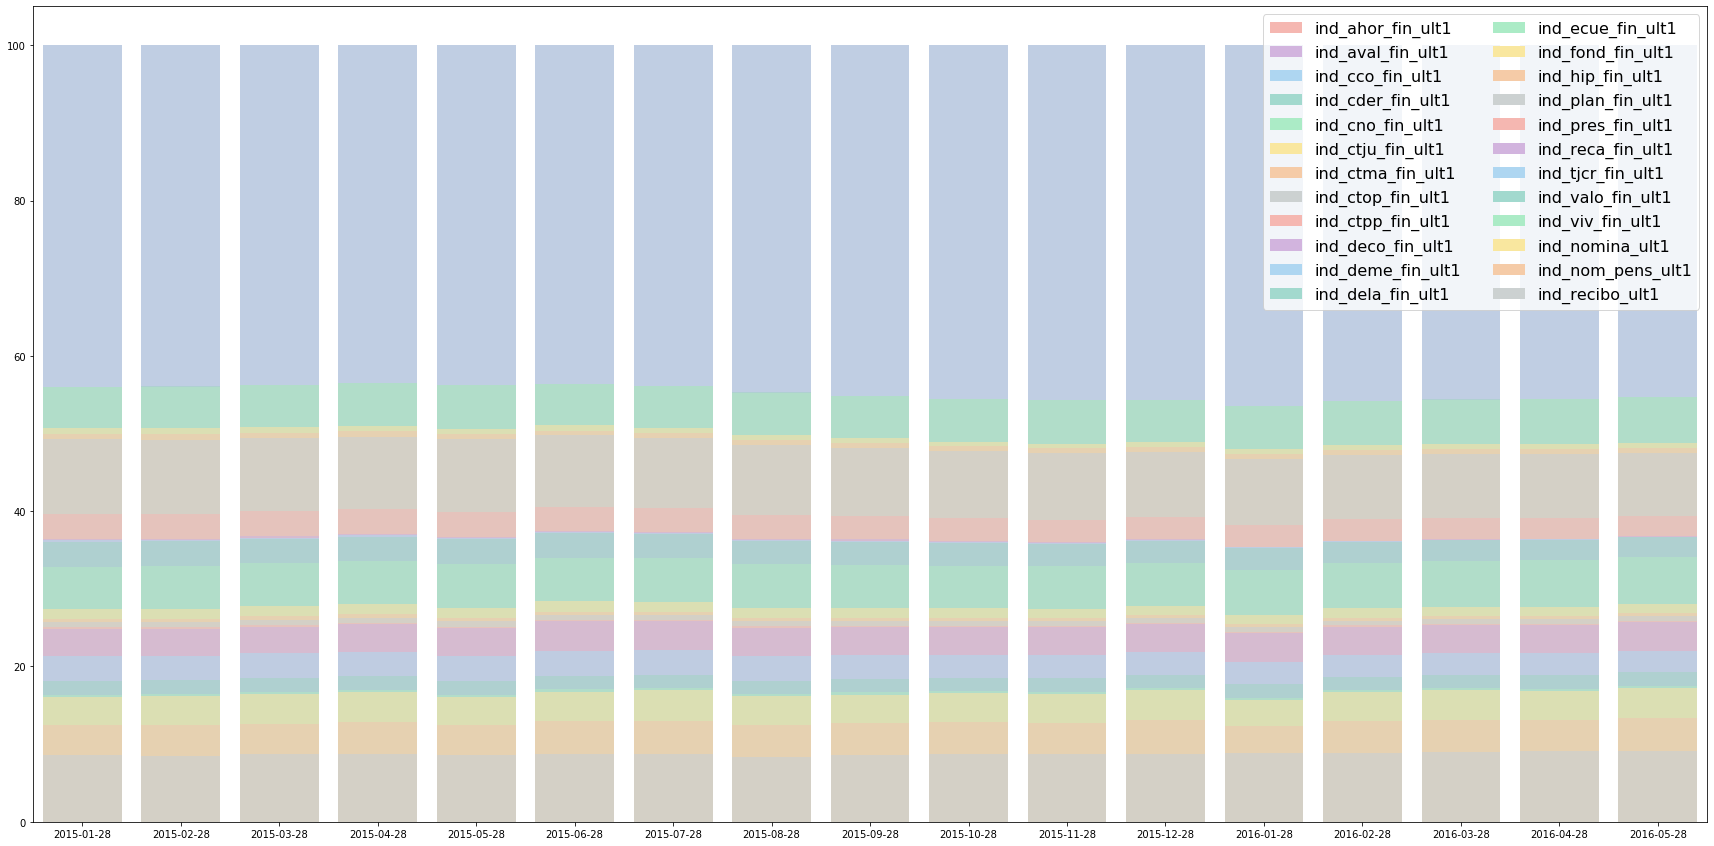

In [22]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color= color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size': 16})

In [3]:
prods = df.columns[24:].tolist()

def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

df_lag = df.copy()
df_lag['int_date'] += 1
df_lag.columns =  [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns]

df_trn = df.merge(df_lag, on=['ncodpers', 'int_date'], how="left")

del df, df_lag

KeyError: "['ind_deco_fin_ult1_add', 'ind_fond_fin_ult1_add', 'ind_cco_fin_ult1_add', 'ind_reca_fin_ult1_add', 'ind_ctpp_fin_ult1_add', 'ind_hip_fin_ult1_add', 'ind_ctma_fin_ult1_add', 'ind_cder_fin_ult1_add', 'ind_ctop_fin_ult1_add', 'ind_valo_fin_ult1_add', 'ind_aval_fin_ult1_add', 'ind_viv_fin_ult1_add', 'ind_plan_fin_ult1_add', 'ind_ecue_fin_ult1_add', 'ind_nomina_ult1_add', 'ind_recibo_ult1_add', 'ind_nom_pens_ult1_add', 'ind_ctju_fin_ult1_add', 'ind_pres_fin_ult1_add', 'ind_cno_fin_ult1_add', 'ind_tjcr_fin_ult1_add', 'ind_dela_fin_ult1_add', 'ind_deme_fin_ult1_add'] not in index"

In [12]:
df_trn[df_trn.columns[24:]].head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1_add,ind_plan_fin_ult1_add,ind_pres_fin_ult1_add,ind_reca_fin_ult1_add,ind_tjcr_fin_ult1_add,ind_valo_fin_ult1_add,ind_viv_fin_ult1_add,ind_nomina_ult1_add,ind_nom_pens_ult1_add,ind_recibo_ult1_add
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_trn.columns[24:]

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'int_date',
       'fecha_dato_prev', 'ind_empleado_prev', 'pais_residencia_prev',
       'sexo_prev', 'age_prev', 'fecha_alta_prev', 'ind_nuevo_prev',
       'antiguedad_prev', 'indrel_prev', 'ult_fec_cli_1t_prev',
       'indrel_1mes_prev', 'tiprel_1mes_prev', 'indresi_prev', 'indext_prev',
       'conyuemp_prev', 'canal_entrada_prev', 'indfall_prev', 'tipodom_prev',
       'cod_prov_prev', 'nomprov_prev', 'ind_actividad_cliente_prev',
      

In [6]:
prods

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

###  신규구매 변수 추출 후 labels 저장

In [9]:
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
    
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)
    
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('../Dataset/labels.csv', index=False)

In [14]:
df_trn[add_cols].head()

,ind_ahor_fin_ult1_add,ind_aval_fin_ult1_add,ind_cco_fin_ult1_add,ind_cder_fin_ult1_add,ind_cno_fin_ult1_add,ind_ctju_fin_ult1_add,ind_ctma_fin_ult1_add,ind_ctop_fin_ult1_add,ind_ctpp_fin_ult1_add,ind_deco_fin_ult1_add,...,ind_hip_fin_ult1_add,ind_plan_fin_ult1_add,ind_pres_fin_ult1_add,ind_reca_fin_ult1_add,ind_tjcr_fin_ult1_add,ind_valo_fin_ult1_add,ind_viv_fin_ult1_add,ind_nomina_ult1_add,ind_nom_pens_ult1_add,ind_recibo_ult1_add
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
labels

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 신규 구매 데이터를 누적 막대 그래프로 시각화

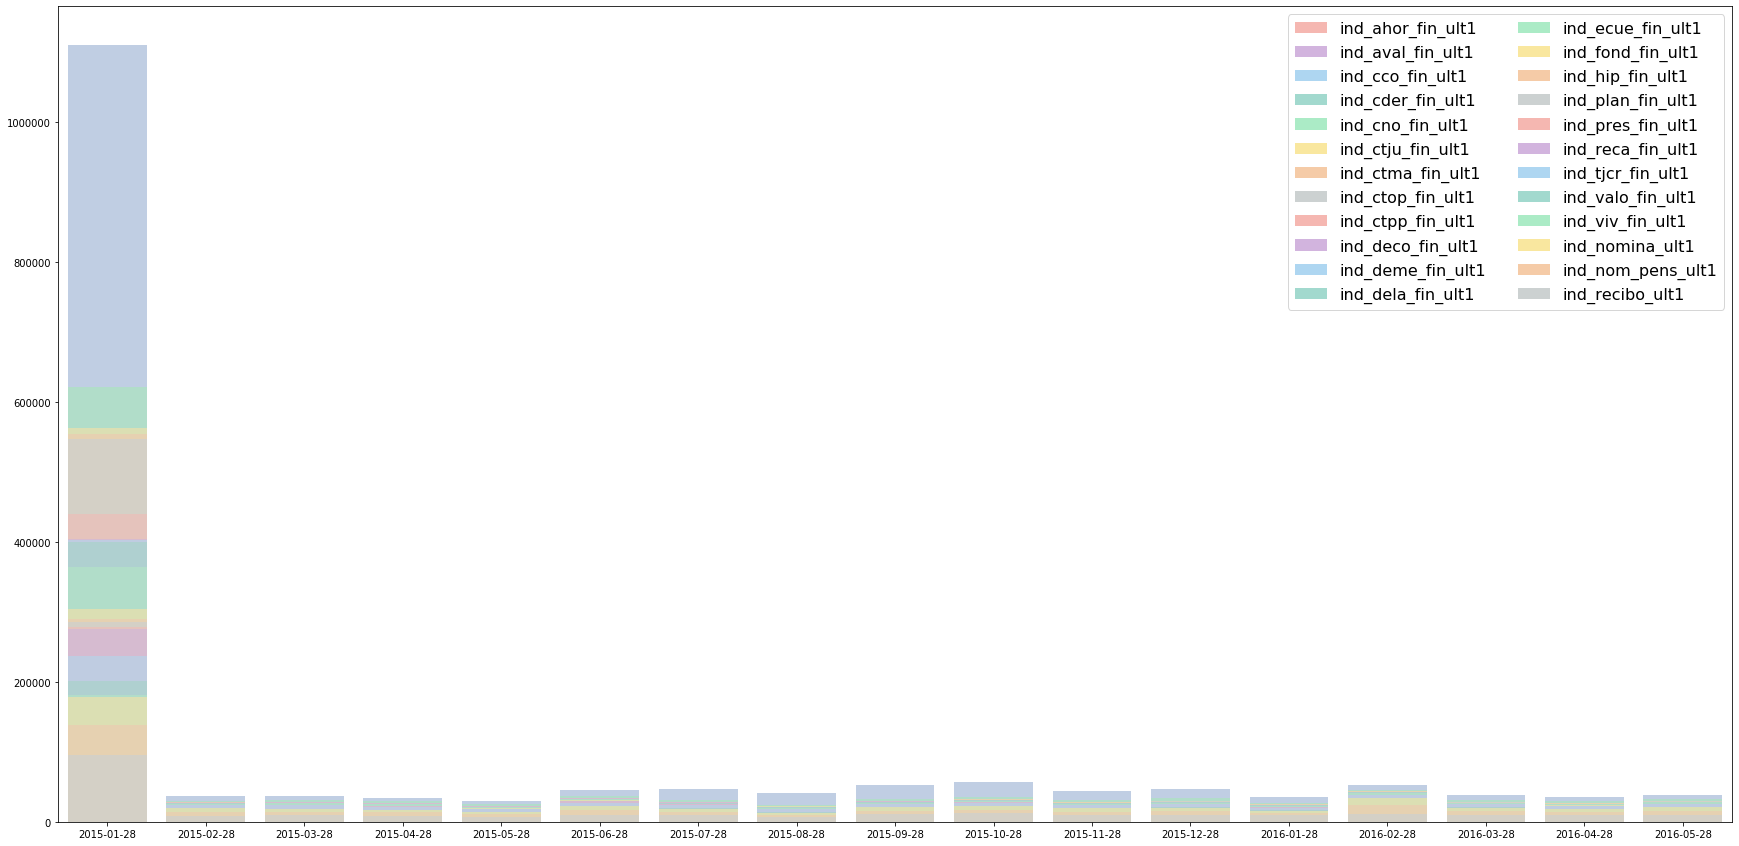

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = pd.read_csv('../Dataset/labels.csv').astype(int)
fecha_dato = pd.read_csv('../Dataset/train_ver2.csv/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size': 16})

### 신규 구매 데이터의 누적 막대 그래프를 월별 상대값으로 시각화

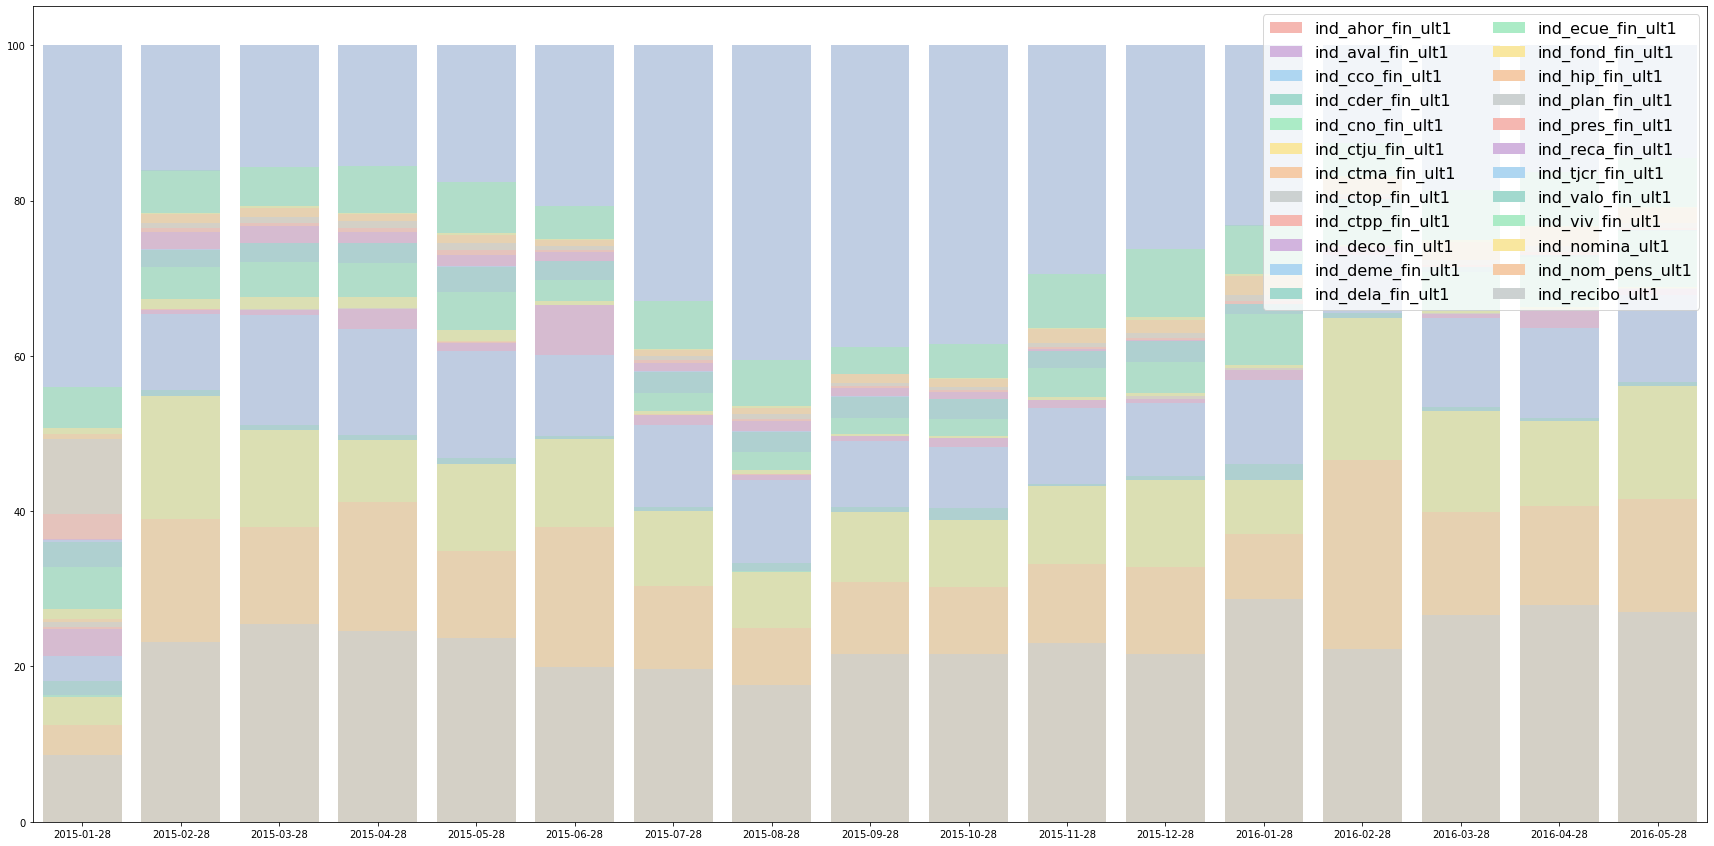

In [48]:
label_sum_percent = (label_sum_over_time / (1. * np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})